# County Voting Profiles Machine Learning Project

This started as a class project for "Advanced Analytic Applications" data science class. It was an analysis of Pennsylvania demographics related to voting preferences. Pennsylvania was chosen because they had the tightest Democrat/Republican split (closest to 50%). It was impossible to acurately match voting districts to census blocks, so I only ended up with 67 records to analyze (county level) and results were unexpected.  

This project will expand to analyze national demographics and confirm characteristics that strongly associate to party affiliation.  

It combines two files from the U.S. Census and one from the MIT Election Data & Science Lab (MEDSL) to create a single datafile on the November 2020 general election.

# Import and clean data files  
*Go to "Merge data files" if you want to do EDA and skip manual cleaning  
Go to "Feature analysis" if you want to start data analysis*



In [1]:
# Setup cleaning environment
import pandas as pd
print("Environment Ready")

Environment Ready


# Import DP1 data (1 of 3)
Demographic and Housing Characteristic (DHC) data from U.S. Census Bureau Decennial Survey at the County level. Includes 50 states, Puerto Rico, and D.C. *(Note on Alaska: See accompanying 'Alaska County' amalgamation file on github for method used to match census area to state senate district. DHC datafile combines 30 Alaskan census areas into 14 'County_fips' created for this analysis)*. Will drop Puerto Rico (rows 3144-3223). Also dropped Kalawao County, Hawaii: 82 residents, none of them voted, dropping will align it with MEDSL file when Kalawao county_fips (15005) is cleaned from MEDSL data.  
https://data.census.gov/table?q=DP1&g=010XX00US$0500000&y=2020


In [2]:
# Import first dataset
DHC_import = pd.read_csv(
    'DECENNIALDP2020.DP1-AKfix.csv', header=1)

# Inspect
print(DHC_import.head())
print(DHC_import.info())

        Geography     Geographic Area Name  \
0  0500000US01001  Autauga County, Alabama   
1  0500000US01003  Baldwin County, Alabama   
2  0500000US01005  Barbour County, Alabama   
3  0500000US01007     Bibb County, Alabama   
4  0500000US01009   Blount County, Alabama   

   Count!!SEX AND AGE!!Total population  \
0                                 58805   
1                                231767   
2                                 25223   
3                                 22293   
4                                 59134   

   Count!!SEX AND AGE!!Total population!!Under 5 years  \
0                                               3513     
1                                              11690     
2                                               1322     
3                                               1270     
4                                               3541     

   Count!!SEX AND AGE!!Total population!!5 to 9 years  \
0                                               3796    
1

## Clean DHC data
All 322 features will need:  
to be renamed (for clarity) or  
to be dropped (for redundency)
Project will prioritize 'percent' variables, scale is improved over 'count'.

In [3]:
# Create new working dataframe
DHC_clean = DHC_import.copy()

# Remove Puerto Rico, rows where GEOID is US72000 or greater
DHC_clean = DHC_clean[~DHC_clean['Geography'].str.startswith('0500000US72')]

# Rename Geography and Geographic Area Name
DHC_clean = DHC_clean.rename(columns={
    'Geography': 'GEOID',
    'Geographic Area Name': 'County'})
DHC_clean['GEOID'] = DHC_clean['GEOID'].str[-5:]

# Confirm
print(DHC_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3126 entries, 0 to 3125
Columns: 322 entries, GEOID to Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied housing units
dtypes: float64(153), int64(162), object(7)
memory usage: 7.7+ MB
None


Continue to CLEAN age data  
[previously looked at 10 and 15 year groups (generation) during original analysis of Pennsylvania only data (before expanding to nationwide study)]

In [4]:
# Rename age variables to keep, drop remaining
DHC_clean = DHC_clean.rename(columns={
    'Count!!SEX AND AGE!!Total population': 'Pop_total',
    'Count!!SEX AND AGE!!Total population!!Under 5 years': 'Total_U5',
    'Count!!SEX AND AGE!!Total population!!5 to 9 years': 'Total_5_9',
    'Count!!SEX AND AGE!!Total population!!10 to 14 years': 'Total_10_14',
    'Count!!SEX AND AGE!!Total population!!15 to 19 years': 'Total_15_19',
    'Count!!SEX AND AGE!!Male population': 'Male_total',
    'Count!!SEX AND AGE!!Male population!!Under 5 years': 'Male_U5',
    'Count!!SEX AND AGE!!Male population!!5 to 9 years': 'Male_5_9',
    'Count!!SEX AND AGE!!Male population!!10 to 14 years': 'Male_10_14',
    'Count!!SEX AND AGE!!Male population!!15 to 19 years': 'Male_15_19',
    'Count!!SEX AND AGE!!Female population': 'Female_total',
    'Count!!SEX AND AGE!!Female population!!Under 5 years': 'Female_U5',
    'Count!!SEX AND AGE!!Female population!!5 to 9 years': 'Female_5_9',
    'Count!!SEX AND AGE!!Female population!!10 to 14 years': 'Female_10_14',
    'Count!!SEX AND AGE!!Female population!!15 to 19 years': 'Female_15_19',
    'Count!!SEX AND AGE!!Total population!!Selected Age Categories!!18 years and over': 'Total_18+',
    'Count!!SEX AND AGE!!Male population!!Selected Age Categories!!18 years and over': 'Male_18+',
    'Count!!SEX AND AGE!!Female population!!Selected Age Categories!!18 years and over': 'Female_18+'})

columns_age_drop = [
    'Count!!SEX AND AGE!!Total population!!20 to 24 years',
    'Count!!SEX AND AGE!!Total population!!25 to 29 years',
    'Count!!SEX AND AGE!!Total population!!30 to 34 years',
    'Count!!SEX AND AGE!!Total population!!35 to 39 years',
    'Count!!SEX AND AGE!!Total population!!40 to 44 years',
    'Count!!SEX AND AGE!!Total population!!45 to 49 years',
    'Count!!SEX AND AGE!!Total population!!50 to 54 years',
    'Count!!SEX AND AGE!!Total population!!55 to 59 years',
    'Count!!SEX AND AGE!!Total population!!60 to 64 years',
    'Count!!SEX AND AGE!!Total population!!65 to 69 years',
    'Count!!SEX AND AGE!!Total population!!70 to 74 years',
    'Count!!SEX AND AGE!!Total population!!75 to 79 years',
    'Count!!SEX AND AGE!!Total population!!80 to 84 years',
    'Count!!SEX AND AGE!!Total population!!85 years and over',
    'Count!!SEX AND AGE!!Total population!!Selected Age Categories!!16 years and over',
    'Count!!SEX AND AGE!!Total population!!Selected Age Categories!!21 years and over',
    'Count!!SEX AND AGE!!Total population!!Selected Age Categories!!62 years and over',
    'Count!!SEX AND AGE!!Total population!!Selected Age Categories!!65 years and over',
    'Count!!SEX AND AGE!!Male population!!20 to 24 years',
    'Count!!SEX AND AGE!!Male population!!25 to 29 years',
    'Count!!SEX AND AGE!!Male population!!30 to 34 years',
    'Count!!SEX AND AGE!!Male population!!35 to 39 years',
    'Count!!SEX AND AGE!!Male population!!40 to 44 years',
    'Count!!SEX AND AGE!!Male population!!45 to 49 years',
    'Count!!SEX AND AGE!!Male population!!50 to 54 years',
    'Count!!SEX AND AGE!!Male population!!55 to 59 years',
    'Count!!SEX AND AGE!!Male population!!60 to 64 years',
    'Count!!SEX AND AGE!!Male population!!65 to 69 years',
    'Count!!SEX AND AGE!!Male population!!70 to 74 years',
    'Count!!SEX AND AGE!!Male population!!75 to 79 years',
    'Count!!SEX AND AGE!!Male population!!80 to 84 years',
    'Count!!SEX AND AGE!!Male population!!85 years and over',
    'Count!!SEX AND AGE!!Male population!!Selected Age Categories!!16 years and over',
    'Count!!SEX AND AGE!!Male population!!Selected Age Categories!!21 years and over',
    'Count!!SEX AND AGE!!Male population!!Selected Age Categories!!62 years and over',
    'Count!!SEX AND AGE!!Male population!!Selected Age Categories!!65 years and over',
    'Count!!SEX AND AGE!!Female population!!20 to 24 years',
    'Count!!SEX AND AGE!!Female population!!25 to 29 years',
    'Count!!SEX AND AGE!!Female population!!30 to 34 years',
    'Count!!SEX AND AGE!!Female population!!35 to 39 years',
    'Count!!SEX AND AGE!!Female population!!40 to 44 years',
    'Count!!SEX AND AGE!!Female population!!45 to 49 years',
    'Count!!SEX AND AGE!!Female population!!50 to 54 years',
    'Count!!SEX AND AGE!!Female population!!55 to 59 years',
    'Count!!SEX AND AGE!!Female population!!60 to 64 years',
    'Count!!SEX AND AGE!!Female population!!65 to 69 years',
    'Count!!SEX AND AGE!!Female population!!70 to 74 years',
    'Count!!SEX AND AGE!!Female population!!75 to 79 years',
    'Count!!SEX AND AGE!!Female population!!80 to 84 years',
    'Count!!SEX AND AGE!!Female population!!85 years and over',
    'Count!!SEX AND AGE!!Female population!!Selected Age Categories!!16 years and over',
    'Count!!SEX AND AGE!!Female population!!Selected Age Categories!!21 years and over',
    'Count!!SEX AND AGE!!Female population!!Selected Age Categories!!62 years and over',
    'Count!!SEX AND AGE!!Female population!!Selected Age Categories!!65 years and over']

# Drop the specified columns
DHC_clean.drop(columns=columns_age_drop, inplace=True)

In [5]:
# Rename percent age groups
DHC_clean = DHC_clean.rename(columns={
    'Percent!!SEX AND AGE!!Total population!!20 to 24 years': '%TOTAL_20_24',
    'Percent!!SEX AND AGE!!Total population!!25 to 29 years': '%TOTAL_25_29',
    'Percent!!SEX AND AGE!!Total population!!30 to 34 years': '%TOTAL_30_34',
    'Percent!!SEX AND AGE!!Total population!!35 to 39 years': '%TOTAL_35_39',
    'Percent!!SEX AND AGE!!Total population!!40 to 44 years': '%TOTAL_40_44',
    'Percent!!SEX AND AGE!!Total population!!45 to 49 years': '%TOTAL_45_49',
    'Percent!!SEX AND AGE!!Total population!!50 to 54 years': '%TOTAL_50_54',
    'Percent!!SEX AND AGE!!Total population!!55 to 59 years': '%TOTAL_55_59',
    'Percent!!SEX AND AGE!!Total population!!60 to 64 years': '%TOTAL_60_64',
    'Percent!!SEX AND AGE!!Total population!!65 to 69 years': '%TOTAL_65_69',
    'Percent!!SEX AND AGE!!Total population!!70 to 74 years': '%TOTAL_70_74',
    'Percent!!SEX AND AGE!!Total population!!75 to 79 years': '%TOTAL_75_79',
    'Percent!!SEX AND AGE!!Total population!!80 to 84 years': '%TOTAL_80_84',
    'Percent!!SEX AND AGE!!Total population!!85 years and over': '%TOTAL_85+',
    'Percent!!SEX AND AGE!!Male population!!20 to 24 years': '%MALE_20_24',
    'Percent!!SEX AND AGE!!Male population!!25 to 29 years': '%MALE_25_29',
    'Percent!!SEX AND AGE!!Male population!!30 to 34 years': '%MALE_30_34',
    'Percent!!SEX AND AGE!!Male population!!35 to 39 years': '%MALE_35_39',
    'Percent!!SEX AND AGE!!Male population!!40 to 44 years': '%MALE_40_44',
    'Percent!!SEX AND AGE!!Male population!!45 to 49 years': '%MALE_45_49',
    'Percent!!SEX AND AGE!!Male population!!50 to 54 years': '%MALE_50_54',
    'Percent!!SEX AND AGE!!Male population!!55 to 59 years': '%MALE_55_59',
    'Percent!!SEX AND AGE!!Male population!!60 to 64 years': '%MALE_60_64',
    'Percent!!SEX AND AGE!!Male population!!65 to 69 years': '%MALE_65_69',
    'Percent!!SEX AND AGE!!Male population!!70 to 74 years': '%MALE_70_74',
    'Percent!!SEX AND AGE!!Male population!!75 to 79 years': '%MALE_75_79',
    'Percent!!SEX AND AGE!!Male population!!80 to 84 years': '%MALE_80_84',
    'Percent!!SEX AND AGE!!Male population!!85 years and over': '%MALE_85+',
    'Percent!!SEX AND AGE!!Female population!!20 to 24 years': '%FEMALE_20_24',
    'Percent!!SEX AND AGE!!Female population!!25 to 29 years': '%FEMALE_25_29',
    'Percent!!SEX AND AGE!!Female population!!30 to 34 years': '%FEMALE_30_34',
    'Percent!!SEX AND AGE!!Female population!!35 to 39 years': '%FEMALE_35_39',
    'Percent!!SEX AND AGE!!Female population!!40 to 44 years': '%FEMALE_40_44',
    'Percent!!SEX AND AGE!!Female population!!45 to 49 years': '%FEMALE_45_49',
    'Percent!!SEX AND AGE!!Female population!!50 to 54 years': '%FEMALE_50_54',
    'Percent!!SEX AND AGE!!Female population!!55 to 59 years': '%FEMALE_55_59',
    'Percent!!SEX AND AGE!!Female population!!60 to 64 years': '%FEMALE_60_64',
    'Percent!!SEX AND AGE!!Female population!!65 to 69 years': '%FEMALE_65_69',
    'Percent!!SEX AND AGE!!Female population!!70 to 74 years': '%FEMALE_70_74',
    'Percent!!SEX AND AGE!!Female population!!75 to 79 years': '%FEMALE_75_79',
    'Percent!!SEX AND AGE!!Female population!!80 to 84 years': '%FEMALE_80_84',
    'Percent!!SEX AND AGE!!Female population!!85 years and over': '%FEMALE_85+'})

Continue to CLEAN median age data

In [6]:
# Rename median variables
DHC_clean = DHC_clean.rename(columns={
    'Count!!MEDIAN AGE BY SEX!!Both sexes': 'MED_AGE',
    'Count!!MEDIAN AGE BY SEX!!Male': 'MED_AGE_M',
    'Count!!MEDIAN AGE BY SEX!!Female': 'MED_AGE_F'})

# Reorder columns to move 'Median Age' next to population totals
cols = DHC_clean.columns.tolist()
cols.insert(20, cols.pop(cols.index('MED_AGE')))
cols.insert(21, cols.pop(cols.index('MED_AGE_M')))
cols.insert(22, cols.pop(cols.index('MED_AGE_F')))
DHC_clean = DHC_clean[cols]

Continue to CLEAN race data

In [7]:
# Rename race variables to keep, drop remaining
DHC_clean = DHC_clean.rename(columns={
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!White alone': '%RACE_White',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone': '%RACE_Black',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino': '%RACE_Latino',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone': '%RACE_Native',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Asian alone': '%RACE_Asian',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone': '%RACE_HI_PI',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Some Other Race alone': '%RACE_Other',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Two or More Races': '%RACE_Mixed'})

columns_race_drop = [
    'Count!!RACE!!Total population',
    'Count!!RACE!!Total population!!One Race',
    'Count!!RACE!!Total population!!One Race!!White',
    'Count!!RACE!!Total population!!One Race!!Black or African American',
    'Count!!RACE!!Total population!!One Race!!American Indian and Alaska Native',
    'Count!!RACE!!Total population!!One Race!!Asian',
    'Count!!RACE!!Total population!!One Race!!Native Hawaiian and Other Pacific Islander',
    'Count!!RACE!!Total population!!One Race!!Some Other Race',
    'Count!!RACE!!Total population!!Two or More Races',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied!!White alone or in combination with one or more other races',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied!!Black or African American alone or in combination with one or more other races',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied!!American Indian and Alaska Native alone or in combination with one or more other races',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied!!Asian alone or in combination with one or more other races',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied!!Native Hawaiian and Other Pacific Islander alone or in combination with one or more other races',
    'Count!!TOTAL RACES TALLIED [1]!!Total races tallied!!Some Other Race alone or in combination with one or more other races',
    'Count!!HISPANIC OR LATINO!!Total population',
    'Count!!HISPANIC OR LATINO!!Total population!!Hispanic or Latino (of any race)',
    'Count!!HISPANIC OR LATINO!!Total population!!Not Hispanic or Latino',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population','Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!White alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Black or African American alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!American Indian and Alaska Native alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Asian alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Some Other Race alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Two or More Races',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!White alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Some Other Race alone',
    'Count!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino!!Two or More Races']

# Drop the specified columns
DHC_clean.drop(columns=columns_race_drop, inplace=True)

Continue to CLEAN relationship data

In [8]:
# Rename relationship variables to keep, drop remaining
DHC_clean = DHC_clean.rename(columns={
    'Percent!!RELATIONSHIP!!Total population!!In households!!Opposite-sex spouse': '%REL_OP_SEX_MAR',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Same-sex spouse': '%REL_S_SEX_MAR',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Opposite-sex unmarried partner': '%REL_OP_SEX_UNMAR',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Same-sex unmarried partner': '%REL_S_SEX_UNMAR',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Other relatives': '%REL_W_RELATIVES',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Nonrelatives': '%REL_NON_REL',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters!!Institutionalized population:!!Male': '%REL_MALE_JAILED',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters!!Institutionalized population:!!Female': '%REL_FEMALE_JAILED',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters!!Noninstitutionalized population:!!Male': '%REL_MALE_GRP_DORM',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters!!Noninstitutionalized population:!!Female': '%REL_FEMALE_GRP_DORM'})

columns_rel_drop = [
    'Count!!RELATIONSHIP!!Total population',
    'Count!!RELATIONSHIP!!Total population!!In households',
    'Count!!RELATIONSHIP!!Total population!!In households!!Householder',
    'Count!!RELATIONSHIP!!Total population!!In households!!Opposite-sex spouse',
    'Count!!RELATIONSHIP!!Total population!!In households!!Same-sex spouse',
    'Count!!RELATIONSHIP!!Total population!!In households!!Opposite-sex unmarried partner',
    'Count!!RELATIONSHIP!!Total population!!In households!!Same-sex unmarried partner',
    'Count!!RELATIONSHIP!!Total population!!In households!!Child [2]',
    'Count!!RELATIONSHIP!!Total population!!In households!!Child [2]!!Under 18 years',
    'Count!!RELATIONSHIP!!Total population!!In households!!Grandchild',
    'Count!!RELATIONSHIP!!Total population!!In households!!Grandchild!!Under 18 years',
    'Count!!RELATIONSHIP!!Total population!!In households!!Other relatives',
    'Count!!RELATIONSHIP!!Total population!!In households!!Nonrelatives',
    'Count!!RELATIONSHIP!!Total population!!In group quarters',
    'Count!!RELATIONSHIP!!Total population!!In group quarters!!Institutionalized population:',
    'Count!!RELATIONSHIP!!Total population!!In group quarters!!Institutionalized population:!!Male',
    'Count!!RELATIONSHIP!!Total population!!In group quarters!!Institutionalized population:!!Female',
    'Count!!RELATIONSHIP!!Total population!!In group quarters!!Noninstitutionalized population:',
    'Count!!RELATIONSHIP!!Total population!!In group quarters!!Noninstitutionalized population:!!Male',
    'Count!!RELATIONSHIP!!Total population!!In group quarters!!Noninstitutionalized population:!!Female']

# Drop the specified columns
DHC_clean.drop(columns=columns_rel_drop, inplace=True)

Continue to CLEAN household data

In [9]:
# Rename household variables to keep, drop remaining
DHC_clean = DHC_clean.rename(columns={
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married couple household': '%HH_MARRIED',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married couple household!!With own children under 18 [3]': '%HH_MAR_W_KIDS',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household': '%HH_NOT_MAR',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household!!With own children under 18 [3]': '%HH_NOT_MAR_W_KIDS',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:!!Living alone': '%HH_MALE_ALONE',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:!!Living alone!!65 years and over': '%HH_MALE_65+',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:!!With own children under 18 [3]': '%HH_MALE_W_KIDS',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:!!Living alone': '%HH_FEMALE_ALONE',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:!!Living alone!!65 years and over': '%HH_FEMALE_65+',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:!!With own children under 18 [3]': '%HH_FEMALE_W_KIDS'})

columns_hhold_drop = [
    'Count!!HOUSEHOLDS BY TYPE!!Total households',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Married couple household',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Married couple household!!With own children under 18 [3]',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household!!With own children under 18 [3]',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:!!Living alone',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:!!Living alone!!65 years and over',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:!!With own children under 18 [3]',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:!!Living alone',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:!!With own children under 18 [3]',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:!!Living alone!!65 years and over',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Households with individuals under 18 years',
    'Count!!HOUSEHOLDS BY TYPE!!Total households!!Households with individuals 65 years and over']

# Drop the specified columns
DHC_clean.drop(columns=columns_hhold_drop, inplace=True)

Continue to CLEAN housing data

In [10]:
# Rename housing variables to keep, drop remaining
DHC_clean = DHC_clean.rename(columns={
    'Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied housing units': '%OWN_HOME',
    'Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied housing units': '%RENT_HOME'})

columns_housing_drop = [
    'Count!!HOUSING OCCUPANCY!!Total housing units',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For rent',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!Rented, not occupied',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For sale only',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!Sold, not occupied',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For seasonal, recreational, or occasional use',
    'Count!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!All other vacants',
    'Count!!VACANCY RATES!!Homeowner vacancy rate (percent) [4]',
    'Count!!VACANCY RATES!!Rental vacancy rate (percent) [5]',
    'Count!!HOUSING TENURE!!Occupied housing units',
    'Count!!HOUSING TENURE!!Occupied housing units!!Owner-occupied housing units',
    'Count!!HOUSING TENURE!!Occupied housing units!!Renter-occupied housing units']

# Drop the specified columns
DHC_clean.drop(columns=columns_housing_drop, inplace=True)

Continue to CLEAN percentage data

In [11]:
# Drop remaining percentage variables
columns_percent_drop = [
    'Percent!!SEX AND AGE!!Total population',
    'Percent!!SEX AND AGE!!Total population!!Under 5 years',
    'Percent!!SEX AND AGE!!Total population!!5 to 9 years',
    'Percent!!SEX AND AGE!!Total population!!10 to 14 years',
    'Percent!!SEX AND AGE!!Total population!!15 to 19 years',
    'Percent!!SEX AND AGE!!Total population!!Selected Age Categories!!16 years and over',
    'Percent!!SEX AND AGE!!Total population!!Selected Age Categories!!18 years and over',
    'Percent!!SEX AND AGE!!Total population!!Selected Age Categories!!21 years and over',
    'Percent!!SEX AND AGE!!Total population!!Selected Age Categories!!62 years and over',
    'Percent!!SEX AND AGE!!Total population!!Selected Age Categories!!65 years and over',
    'Percent!!SEX AND AGE!!Male population',
    'Percent!!SEX AND AGE!!Male population!!Under 5 years',
    'Percent!!SEX AND AGE!!Male population!!5 to 9 years',
    'Percent!!SEX AND AGE!!Male population!!10 to 14 years',
    'Percent!!SEX AND AGE!!Male population!!15 to 19 years',
    'Percent!!SEX AND AGE!!Male population!!Selected Age Categories!!16 years and over',
    'Percent!!SEX AND AGE!!Male population!!Selected Age Categories!!18 years and over',
    'Percent!!SEX AND AGE!!Male population!!Selected Age Categories!!21 years and over',
    'Percent!!SEX AND AGE!!Male population!!Selected Age Categories!!62 years and over',
    'Percent!!SEX AND AGE!!Male population!!Selected Age Categories!!65 years and over',
    'Percent!!SEX AND AGE!!Female population',
    'Percent!!SEX AND AGE!!Female population!!Under 5 years',
    'Percent!!SEX AND AGE!!Female population!!5 to 9 years',
    'Percent!!SEX AND AGE!!Female population!!10 to 14 years',
    'Percent!!SEX AND AGE!!Female population!!15 to 19 years',
    'Percent!!SEX AND AGE!!Female population!!Selected Age Categories!!16 years and over',
    'Percent!!SEX AND AGE!!Female population!!Selected Age Categories!!18 years and over',
    'Percent!!SEX AND AGE!!Female population!!Selected Age Categories!!21 years and over',
    'Percent!!SEX AND AGE!!Female population!!Selected Age Categories!!62 years and over',
    'Percent!!SEX AND AGE!!Female population!!Selected Age Categories!!65 years and over',
    'Percent!!MEDIAN AGE BY SEX!!Both sexes',
    'Percent!!MEDIAN AGE BY SEX!!Male',
    'Percent!!MEDIAN AGE BY SEX!!Female',
    'Percent!!RACE!!Total population',
    'Percent!!RACE!!Total population!!One Race',
    'Percent!!RACE!!Total population!!One Race!!White',
    'Percent!!RACE!!Total population!!One Race!!Black or African American',
    'Percent!!RACE!!Total population!!One Race!!American Indian and Alaska Native',
    'Percent!!RACE!!Total population!!One Race!!Asian',
    'Percent!!RACE!!Total population!!One Race!!Native Hawaiian and Other Pacific Islander',
    'Percent!!RACE!!Total population!!One Race!!Some Other Race',
    'Percent!!RACE!!Total population!!Two or More Races',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied!!White alone or in combination with one or more other races',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied!!Black or African American alone or in combination with one or more other races',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied!!American Indian and Alaska Native alone or in combination with one or more other races',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied!!Asian alone or in combination with one or more other races',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied!!Native Hawaiian and Other Pacific Islander alone or in combination with one or more other races',
    'Percent!!TOTAL RACES TALLIED [1]!!Total races tallied!!Some Other Race alone or in combination with one or more other races',
    'Percent!!HISPANIC OR LATINO!!Total population',
    'Percent!!HISPANIC OR LATINO!!Total population!!Hispanic or Latino (of any race)',
    'Percent!!HISPANIC OR LATINO!!Total population!!Not Hispanic or Latino',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!White alone',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Black or African American alone',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!American Indian and Alaska Native alone',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Asian alone',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Some Other Race alone',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Hispanic or Latino!!Two or More Races',
    'Percent!!HISPANIC OR LATINO BY RACE!!Total population!!Not Hispanic or Latino',
    'Percent!!RELATIONSHIP!!Total population',
    'Percent!!RELATIONSHIP!!Total population!!In households',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Householder',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Child [2]',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Child [2]!!Under 18 years',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Grandchild',
    'Percent!!RELATIONSHIP!!Total population!!In households!!Grandchild!!Under 18 years',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters!!Institutionalized population:',
    'Percent!!RELATIONSHIP!!Total population!!In group quarters!!Noninstitutionalized population:',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Male householder, no spouse or partner present:',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse or partner present:',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Households with individuals under 18 years',
    'Percent!!HOUSEHOLDS BY TYPE!!Total households!!Households with individuals 65 years and over',
    'Percent!!HOUSING OCCUPANCY!!Total housing units',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For rent',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!Rented, not occupied',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For sale only',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!Sold, not occupied',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For seasonal, recreational, or occasional use',
    'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!All other vacants',
    'Percent!!VACANCY RATES!!Homeowner vacancy rate (percent) [4]',
    'Percent!!VACANCY RATES!!Rental vacancy rate (percent) [5]',
    'Percent!!HOUSING TENURE!!Occupied housing units']

# Drop the specified columns
DHC_clean.drop(columns=columns_percent_drop, inplace=True)

#Confirm
#print(DHC_clean.info())

## Transform DHC data

Create new 'Under 18' and '18-19' age groups

In [12]:
# Create new working dataframe
DHC_transform = DHC_clean.copy()

# Calculate "Under 18" by subtracting "18 years and over" from "totals"
DHC_transform['Total_U18'] = DHC_transform[
    'Pop_total'] - DHC_transform['Total_18+']
DHC_transform['Male_U18'] = DHC_transform[
    'Male_total'] - DHC_transform['Male_18+']
DHC_transform['Female_U18'] = DHC_transform[
    'Female_total'] - DHC_transform['Female_18+']

# Calculate 'Total_18-19' by adding all ages 0-19 and subtracting U18
DHC_transform['Total_18_19'] = (DHC_transform['Total_U5'] +
    DHC_transform['Total_5_9'] + DHC_transform['Total_10_14'] +
    DHC_transform['Total_15_19'] - DHC_transform['Total_U18'])

# Repeat for Male 18-19
DHC_transform['Male_18_19'] = (DHC_transform['Male_U5'] +
    DHC_transform['Male_5_9'] + DHC_transform['Male_10_14'] +
    DHC_transform['Male_15_19'] - DHC_transform['Male_U18'])

# Repeat for Female 18-19
DHC_transform['Female_18_19'] = (DHC_transform['Female_U5'] +
    DHC_transform['Female_5_9'] + DHC_transform['Female_10_14'] +
    DHC_transform['Female_15_19'] - DHC_transform['Female_U18'])

# Calculate "%_18-19" by dividing by "totals"
DHC_transform['%TOTAL_18_19'] = (
    DHC_transform['Total_18_19'] / DHC_transform['Pop_total']* 100).round(2)
DHC_transform['%MALE_18_19'] = (
    DHC_transform['Male_18_19'] / DHC_transform['Male_total']* 100).round(2)
DHC_transform['%FEMALE_18_19'] = (
    DHC_transform['Female_18_19'] / DHC_transform['Female_total']* 100).round(2)

# Can now drop these columns
columns_tform_drop = [
    'Total_U5', 'Male_U5', 'Female_U5',
    'Total_5_9', 'Male_5_9', 'Female_5_9',
    'Total_10_14', 'Male_10_14', 'Female_10_14',
    'Total_15_19', 'Male_15_19', 'Female_15_19',
    'Total_18+', 'Male_18+', 'Female_18+',
    'Total_U18', 'Male_U18', 'Female_U18',
    'Total_18_19', 'Male_18_19', 'Female_18_19']
DHC_transform.drop(columns=columns_tform_drop, inplace=True)

# Reorder columns to move '18-19' before '20-24'
cols = DHC_transform.columns.tolist()
cols.insert(8, cols.pop(cols.index('%TOTAL_18_19')))
cols.insert(23, cols.pop(cols.index('%MALE_18_19')))
cols.insert(38, cols.pop(cols.index('%FEMALE_18_19')))
DHC_transform = DHC_transform[cols]

#Confirm
#pd.set_option('display.max_columns', None)
#print(DHC_transform.head())
#print(DHC_transform.info())

## Save DHC cleaned data

In [13]:
# Create the tidy dataframe
DHC_tidy = DHC_transform.copy()

DHC_tidy.to_csv('DHC_tidy.csv', index=False)

# Import P2 data (2 of 3)

P2 data is the population living in urban or rural (PUR) areas within each county **[number of households also available (H2)]**.  
For the 2020 Census, an urban area will comprise a densely settled core of census blocks that meet minimum population density requirements. This includes adjacent territory containing non-residential urban land uses. To qualify as an urban area, the territory identified according to criteria must have a population of at least 5,000. *(Note on Alaska: See accompanying 'Alaska County' amalgamation file on github for method used to match census area to state senate district. PUR datafile combines 30 census areas into 14 'County_fips' created for this analysis)*. Also dropped Kalawao County, Hawaii: 82 rural residents, none of them voted, dropping will align it with MEDSL file when Kalawao county_fips (15005) is cleaned from MEDSL data.    
https://data.census.gov/all?q=urban+and+rural&g=010XX00US$0500000

In [14]:
# Import next dataset
PUR_import = pd.read_csv(
    'DECENNIALDHC2020.P2-AKfix.csv', header=1)

# Inspect
print(PUR_import.info())
print(PUR_import.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Geography                             3204 non-null   object
 1   Geographic Area Name                  3204 non-null   object
 2    !!Total:                             3204 non-null   int64 
 3    !!Total:!!Urban                      3204 non-null   int64 
 4    !!Total:!!Rural                      3204 non-null   int64 
 5    !!Total:!!Not defined for this file  3204 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 150.3+ KB
None
        Geography     Geographic Area Name   !!Total:   !!Total:!!Urban  \
0  0500000US01001  Autauga County, Alabama      58805             34885   
1  0500000US01003  Baldwin County, Alabama     231767            144654   
2  0500000US01005  Barbour County, Alabama      25223              8596   
3  050000

## Clean PUR data

In [15]:
# Create new working dataframe
PUR_clean = PUR_import.copy()

# Remove Puerto Rico: rows where GEOID is US72000 or greater
PUR_clean = PUR_clean[~PUR_clean['Geography'].str.startswith('0500000US72')]

# Rename variables to keep and drop remaining
PUR_clean = PUR_clean.rename(columns={
    'Geography': 'GEOID',
    ' !!Total:': 'Pop_total',
    ' !!Total:!!Urban': 'Pop_Urban',
    ' !!Total:!!Rural': 'Pop_Rural'})

PUR_clean['GEOID'] = PUR_clean['GEOID'].str[-5:]

# Calculate Urban percent
PUR_clean['%Urban_pop'] = (
    (PUR_clean['Pop_Urban'] / PUR_clean['Pop_total']) * 100).round(2)

# Drop the specified columns
columns_PUR_drop = ['Pop_total',
                    'Geographic Area Name',
                    ' !!Total:!!Not defined for this file']
PUR_clean.drop(columns=columns_PUR_drop, inplace=True)

# Confirm
#print(PUR_clean.info())

## Save PUR data

In [16]:
# Create the tidy dataframe
PUR_tidy = PUR_clean.copy()

PUR_tidy.to_csv('PUR_tidy.csv', index=False)

# Import MEDSL data (3 of 3)
2020 general election results for most* (46) of the 50 states and D.C. downloaded from MEDSL (the MIT Election Data and Science Lab) https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NT66Z3  

* ALASKA: voting data is not gathered by county, MEDSL 'county_fips' is empty. Used https://www.elections.alaska.gov/results/20GENR/Map/ Votes aggregated to state senate districts (1 - 40). See accompanying 'Alaska County' amalgamation file on github for method used to match 30 census areas to 40 state senate districts. MEDSL datafile uses 14 County_fips created for this analysis. Datafile only has the 4 variables that will be utilized here.

* INDIANA: MEDSL missing multiple county results. Used https://indianavoters.in.gov/ENRHistorical/ElectionResults  Datafile only has the 4 variables that will be utilized here, aggregated to the county level  

* NEW MEXICO: To protect the privacy of voters, New Mexico "masks" vote totals in precinct results for candidates with small vote tallies. Used https://electionstats.sos.nm.gov/contest/13250  Datafile only has the 4 variables that will be utilized here, aggregated to the county level  

* NEVADA: To protect the privacy of voters, Nevada "masks" vote totals in precinct results for candidates with 1-10 vote tallies. Used https://www.nvsos.gov/SOSelectionPages/results/2020StateWideGeneral/ElectionSummary.aspx  Datafile only has the 4 variables that will be utilized here, aggregated to the county level

##Pre-import processing Notes:  
The below adjustments were made to the MEDSL datafiles to standardize cleaning and processing.   

1. HAWAII: Adjusted DHC and PUR data regarding Kalawao County, Hawaii. Both have fips 15005, but there are no official votes cast, removed so all files align  

1. MAINE: Uniformed and Overseas Citizens Absentee Voting tallied seperately in 23000 fips, 23000 deleted to match DHC and PUR with votes added to 23005 (most populous county)  

1. MICHIGAN: MEDSL precinct data contains precinct "9999", which are "statistical adjustments" rows. There were minor corrections needed to match official results at https://www.michigan.gov/sos/elections/election-results-and-data/candidate-listings-and-election-results-by-county  

1. MINNESOTA: 'DEMOCRATIC FARMER LABOR' party changed to 'DEMOCRAT'  

1. MISSOURI: MEDSL tallied Kansas City votes seperately in 36000 fips. Utillized https://www.sos.mo.gov/CMSImages/ElectionResultsStatistics/November3_2020GeneralElection.pdf to aportion some votes to Jackson County with remainder assigned to Clay County (official results not available on https://www.voteclaycountymo.gov/election-results), but totals match State official numbers  

1.  NEW YORK: 'CONSERVATIVE' party changed to 'REPUBLICAN'  
'WORKING FAMILIES' party changed to 'DEMOCRAT'  

1.  NORTH DAKOTA: 'DEMOCRATIC-NPL' party changed to 'DEMOCRAT' and 'county_fips' for OGLALA LAKOTA County changed from 46113 to 46102 to match data from DHC and PUR  

1.  OREGON: Sherman County included cadidate "BALLOTS CAST" which totaled all votes in each precinct: Deleted  

1.  PENNSYLVANIA: 1 blank 'party_detailed' vote cast for Trump, party changed to 'REPUBLICAN'  

1.  VERMONT: 3 blank 'party_detailed' votes cast for Trump, party changed to 'REPUBLICAN'  
6 blank 'party_detailed' votes cast for Biden, party changed to 'DEMOCRAT'  

##Post-import cleaning Notes:
1.  All blanks in 'party_detailed' have been verified as writein votes cast for "THIRD" party candidates  

2.  In Nov 2020, there were over 50 recognized political parties in the US.  
DEM and REP ballots accounted for 96% of total votes. Third parties accounted for 1-4% of the vote in each state. "THIRD" will combine any vote NOT for Presidents Biden or Trump.  



In [17]:
# Define list of all 51 voter CSV files to process (50 states plus D.C.)
file_list = glb.glob('2020-*-precinct-general.csv')

# Define function to read, select features, and clean a single CSV file
def process_file(file_path):

    try:
# Specify data types, let 'votes' be float during import
        dtype_spec = {'office': str, 'county_fips': str,
                      'party_detailed': str, 'votes': float}
        df = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)

# Filter for President in 'office' to avoid counting multiple votes per person
# Only analyze US Presidential race (it has the most voter participation)
        df = df[df['office'] == 'US PRESIDENT'].copy()
        df = df[['office', 'county_fips', 'party_detailed', 'votes']]
        df = df.rename(columns={
            'county_fips': 'GEOID',
            'party_detailed': 'PARTY',
            'votes': 'VOTES'})
        return df

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

NameError: name 'glb' is not defined

In [ ]:
# Iterate through the file list, apply function, and store dataframes
all_processed_dataframes = [
    process_file(file_path) for file_path in file_list]

# Filter out any None values if errors occurred during processing
all_processed_dataframes = [
    df for df in all_processed_dataframes if df is not None]

# Concatenate all processed files into single dataframe
US_combined = pd.concat(all_processed_dataframes, ignore_index=True)

# Confirm
#print(US_combined.info())
#print(US_combined.head())

## Clean MEDSL data

In [ ]:
# Fill missing values with 'THIRD'
US_combined.loc[:, 'PARTY'] = US_combined['PARTY'].fillna('THIRD')

# Create list of parties to rename
print(sorted(US_combined['PARTY'].unique()))

In [ ]:
# Define other parties to replace with 'THIRD' (remove DEMOCRAT and REPUBLICAN from 'US_combined' output)
other_parties = [
    'ALLIANCE', 'ALLIANCE PARTY', 'AMERICAN', 'AMERICAN CONSTITUTION', 'AMERICAN SHOPPING', 'AMERICAN SOLIDARITY', 'APPROVAL VOTING', 'BECOMING ONE NATION', 'BIRTHDAY', 'BLANK', 'BOILING FROG', 'BREAD AND ROSES', 'BULL MOOSE', 'C.U.P', 'CONSTITUTION', 'CONSTITUTION PARTY', 'CUP', 'FREEDOM AND PROSPERITY', 'GENEALOGY KNOW YOUR FAMILY HISTORY', 'GREEN', 'GREEN INDEPENDENT', 'GREEN-RAINBOW', 'GRUMPY OLD PATRIOTS', 'INDEPENDENCE', 'INDEPENDENCE ALLIANCE', 'INDEPENDENT', 'INDEPENDENT AMERICAN', 'LIBERTARIAN', 'LIBERTY UNION', 'LIFE', 'LIFE LIBERTY CONSTITUTION', 'NATURAL LAW PARTY', 'NONE', 'NONPARTISAN', 'OREGON PROGRESSIVE', 'OTHER', 'PACIFIC GREEN', 'PARTY FOR SOCIALISM AND LIBERATION', 'PROGRESSIVE', 'PROHIBITION', 'REFORM', 'SOCIALISM', 'SOCIALISM AND LIBERATION', 'SOCIALIST', 'SOCIALIST EQUALITY', 'SOCIALIST WORKERS', 'STATEWIDE GREEN', 'UNAFFILIATED', 'UNITY', 'UNITY AMERICA', 'UNITY OF COLORADO', 'US TAXPAYERS PARTY']

# Replace these other parties with 'THIRD'
US_combined['PARTY'] = US_combined['PARTY'].replace(other_parties, 'THIRD')

# Tally Presidential votes
PRES_votes = (US_combined.groupby('PARTY', as_index=False)['VOTES']
    .sum().sort_values(by='VOTES', ascending=False))

# Confirm
print(US_combined.info())
print(US_combined['PARTY'].unique())
print(US_combined['PARTY'].value_counts(dropna=False))
print(PRES_votes)

In [ ]:
# Pivot to get vote counts by Party
US_transform = (US_combined.groupby(['GEOID', 'PARTY'])['VOTES']
    .sum()
    .unstack(fill_value=0)
    .reset_index())

# Rename columns that were the party names after unstacking
US_transform = US_transform.rename(columns={
    'DEMOCRAT': 'DEM_VOTES',
    'REPUBLICAN': 'REP_VOTES',
    'THIRD': 'THRD_VOTES'})

# Change vote columns to int32
vote_cols = ['DEM_VOTES', 'REP_VOTES', 'THRD_VOTES']
US_transform[vote_cols] = US_transform[vote_cols].astype('int32')

# Confirm
#print(US_transform.info())
#print(US_transform.head())

## Create share of vote feature

In [ ]:
# Create new working dataframe
US_tranfm2 = US_transform.copy()

# Compute TOTAL_VOTES, drop any where the sum of all votes = 0
US_tranfm2['TOTAL_VOTES'] = US_tranfm2[vote_cols].sum(axis=1).astype('int32')
US_tranfm2 = US_tranfm2[US_tranfm2['TOTAL_VOTES'] != 0]

# Compute shares of votes
US_tranfm2['DEM_SHARE'] = (
    (US_tranfm2['DEM_VOTES'] / US_tranfm2['TOTAL_VOTES'])* 100).round(2)
US_tranfm2['REP_SHARE'] = (
    (US_tranfm2['REP_VOTES'] / US_tranfm2['TOTAL_VOTES'])* 100).round(2)
US_tranfm2['THRD_SHARE'] = (
    (US_tranfm2['THRD_VOTES'] / US_tranfm2['TOTAL_VOTES'])* 100).round(2)

# Confirm
#print(US_tranfm2.info())
#print(US_tranfm2.head())

## Create political leaning feature

In [ ]:
# View values of DEM_SHARE, ensure all >0
print(sorted(US_tranfm2['DEM_SHARE'].unique()))

In [ ]:
# Create new working dataframe
US_tranfm3 = US_tranfm2.copy()

# Define the political leaning function
def determine_win(row):
# Only DEM or REP win, only consider their shares for determining lead
    shares = {
        'DEM': row['DEM_SHARE'],
        'REP': row['REP_SHARE']}

    # Determine the winning party between DEM and REP
    if shares['DEM'] > shares['REP']:
        party_win = 1 # Democrat wins = Positive lead for DEM
        party_lead = (shares['DEM'] - shares['REP']) / 100
    elif shares['REP'] > shares['DEM']: # Corrected from else
        party_win = 0 # Republican wins = Negative lead for REP
        party_lead = (shares['DEM'] - shares['REP']) / 100
    else: # Tie (very unlikely)
        party_win = 2
        party_lead = 0.0

    return party_win, round(party_lead, 2)

# Apply function and create two new variables
US_tranfm3[['PARTY_WIN', 'PARTY_LEAD']] = US_tranfm3.apply(
    determine_win, axis=1).apply(pd.Series)

# Convert 'PARTY_WIN' to int
US_tranfm3['PARTY_WIN'] = US_tranfm3['PARTY_WIN'].astype('int32')

# Confirm
print(US_tranfm3.head(10))

## Save MEDSL data

In [ ]:
# Order variables
final_cols = ['GEOID', 'TOTAL_VOTES',
              'DEM_VOTES', 'DEM_SHARE',
              'REP_VOTES', 'REP_SHARE',
              'THRD_VOTES', 'THRD_SHARE',
              'PARTY_WIN', 'PARTY_LEAD']

# Create the tidy dataframe
MEDSL_tidy = US_tranfm3[final_cols]

MEDSL_tidy.to_csv('MEDSL_tidy.csv', index=False)

# Confirm
print(MEDSL_tidy.info())

# Merge data files

# Import _tidy files here if you do not want to clean the data

In [18]:
import pandas as pd
# Import here if utilizing the _tidy files
DHC_tidy = pd.read_csv('DHC_tidy.csv')
PUR_tidy = pd.read_csv('PUR_tidy.csv')
MEDSL_tidy = pd.read_csv('MEDSL_tidy.csv')

# Confirm
print(DHC_tidy.info())
print(PUR_tidy.info())
print(MEDSL_tidy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GEOID                 3126 non-null   int64  
 1   County                3126 non-null   object 
 2   Pop_total             3126 non-null   int64  
 3   Male_total            3126 non-null   int64  
 4   Female_total          3126 non-null   int64  
 5   MED_AGE               3126 non-null   float64
 6   MED_AGE_M             3126 non-null   float64
 7   MED_AGE_F             3126 non-null   float64
 8   %TOTAL_18_19          3126 non-null   float64
 9   %TOTAL_20_24          3126 non-null   float64
 10  %TOTAL_25_29          3126 non-null   float64
 11  %TOTAL_30_34          3126 non-null   float64
 12  %TOTAL_35_39          3126 non-null   float64
 13  %TOTAL_40_44          3126 non-null   float64
 14  %TOTAL_45_49          3126 non-null   float64
 15  %TOTAL_50_54         

In [19]:
# Merge first two files
TWO_join = pd.merge(DHC_tidy, PUR_tidy, on='GEOID', how='outer')

# Confirm
#print(TWO_join.info())

In [20]:
# Merge with third dataset
FULL_DF = pd.merge(TWO_join, MEDSL_tidy, on='GEOID', how='outer')

# change GEOID type
FULL_DF['GEOID'] = FULL_DF['GEOID'].astype(str)

# Confirm
#print(FULL_DF.info())

In [21]:
# Create new working dataframe
FULL_transform = FULL_DF.copy()

# Split 'Name' into 'County' and 'State'
FULL_transform[['County', 'State']] = FULL_transform[
    'County'].str.split(', ', expand=True)

# Reorder columns to move 'State' to index 1
cols = FULL_transform.columns.tolist()
cols.insert(1, cols.pop(cols.index('State')))
MERGED_DF = FULL_transform[cols]

## Save MERGED datafile

In [22]:
MERGED_DF.to_csv('MERGED_DF.csv', index=False)

# Exploratory Data Analysis (with MERGED_DF)

In [23]:
# Setup exploration environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
print("Environment Ready")

Environment Ready


In [24]:
MERGED_DF = pd.read_csv('MERGED_DF.csv')
# ensure GEOID is an object
MERGED_DF['GEOID'] = MERGED_DF['GEOID'].astype(str)

# Confirm
print(MERGED_DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 97 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GEOID                 3126 non-null   object 
 1   State                 3126 non-null   object 
 2   County                3126 non-null   object 
 3   Pop_total             3126 non-null   int64  
 4   Male_total            3126 non-null   int64  
 5   Female_total          3126 non-null   int64  
 6   MED_AGE               3126 non-null   float64
 7   MED_AGE_M             3126 non-null   float64
 8   MED_AGE_F             3126 non-null   float64
 9   %TOTAL_18_19          3126 non-null   float64
 10  %TOTAL_20_24          3126 non-null   float64
 11  %TOTAL_25_29          3126 non-null   float64
 12  %TOTAL_30_34          3126 non-null   float64
 13  %TOTAL_35_39          3126 non-null   float64
 14  %TOTAL_40_44          3126 non-null   float64
 15  %TOTAL_45_49         

## Basic Information

In [25]:
# Display descriptive statistics for numerical columns
print("Number of rows:", MERGED_DF.shape[0], '(Number of counties)')
print("Number of columns:", MERGED_DF.shape[1])
print("\nMissing Values: None")
print(MERGED_DF.isna().sum().sort_values(ascending=False))

print("\nDescriptive Statistics for Numerical Columns:")
display(MERGED_DF.describe())

# Display value counts for categorical column (PARTY_WIN)
print("\nValue Counts for 'PARTY_WIN' \n0: Republican Win\n1: Democrat Win:")
display(MERGED_DF['PARTY_WIN'].value_counts())

Number of rows: 3126 (Number of counties)
Number of columns: 97

Missing Values: None
              3126
State            0
County           0
Pop_total        0
Male_total       0
              ... 
REP_VOTES        0
THRD_VOTES       0
THRD_SHARE       0
PARTY_WIN        0
PARTY_LEAD       0
Length: 97, dtype: int64

Descriptive Statistics for Numerical Columns:


,Pop_total,Male_total,Female_total,MED_AGE,MED_AGE_M,MED_AGE_F,%TOTAL_18_19,%TOTAL_20_24,%TOTAL_25_29,%TOTAL_30_34,...,TOTAL_VOTES,DEM_VOTES,DEM_SHARE,REP_VOTES,REP_SHARE,THRD_VOTES,THRD_SHARE,PARTY_WIN,PARTY_LEAD,
count,3.126000e+03,3.126000e+03,3.126000e+03,3126.00000,3126.000000,3126.000000,3126.000000,3126.000000,3126.00000,3126.000000,...,3.126000e+03,3.126000e+03,3126.000000,3.126000e+03,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,0.0
mean,1.060298e+05,5.204279e+04,5.398702e+04,42.25739,41.119162,43.470857,2.567674,5.704237,5.61697,5.857837,...,5.075039e+04,2.600132e+04,33.305256,2.374398e+04,64.863500,1005.088292,1.831174,0.174664,-0.315627,NaN
std,3.365838e+05,1.645608e+05,1.720574e+05,5.26436,5.275468,5.337571,1.063086,2.264604,1.14348,0.948636,...,1.501997e+05,9.730016e+04,15.968475,5.423705e+04,16.158527,3151.182124,0.848999,0.379740,0.321188,NaN
min,6.400000e+01,3.700000e+01,2.700000e+01,22.70000,21.800000,22.600000,0.280000,0.800000,0.00000,2.600000,...,6.600000e+01,4.000000e+00,3.090000,6.000000e+01,5.400000,0.000000,0.000000,0.000000,-0.930000,NaN
25%,1.098650e+04,5.505000e+03,5.449500e+03,39.10000,38.000000,40.400000,2.090000,4.600000,4.90000,5.300000,...,5.360250e+03,1.303750e+03,20.960000,3.672500e+03,55.630000,80.000000,1.250000,0.000000,-0.560000,NaN
50%,2.588900e+04,1.294200e+04,1.299950e+04,42.10000,40.800000,43.500000,2.360000,5.300000,5.50000,5.800000,...,1.252700e+04,3.707000e+03,29.990000,8.281500e+03,68.195000,206.000000,1.680000,0.000000,-0.380000,NaN
75%,6.861725e+04,3.462450e+04,3.460425e+04,45.10000,43.900000,46.575000,2.710000,6.100000,6.10000,6.300000,...,3.371000e+04,1.218275e+04,42.462500,2.080175e+04,77.380000,657.000000,2.230000,0.000000,-0.130000,NaN
max,1.001401e+07,4.906513e+06,5.107496e+06,68.50000,67.700000,69.000000,17.460000,33.500000,13.60000,11.800000,...,4.263443e+06,3.028885e+06,92.150000,1.145530e+06,96.180000,89028.000000,11.480000,1.000000,0.870000,NaN



Value Counts for 'PARTY_WIN' 
0: Republican Win
1: Democrat Win:


,count
PARTY_WIN,
0,2580
1,546


## Visualizations

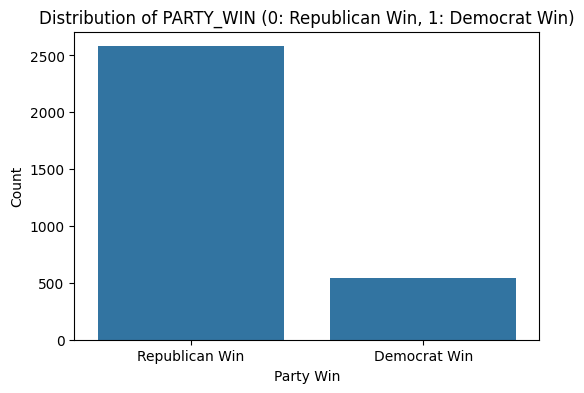

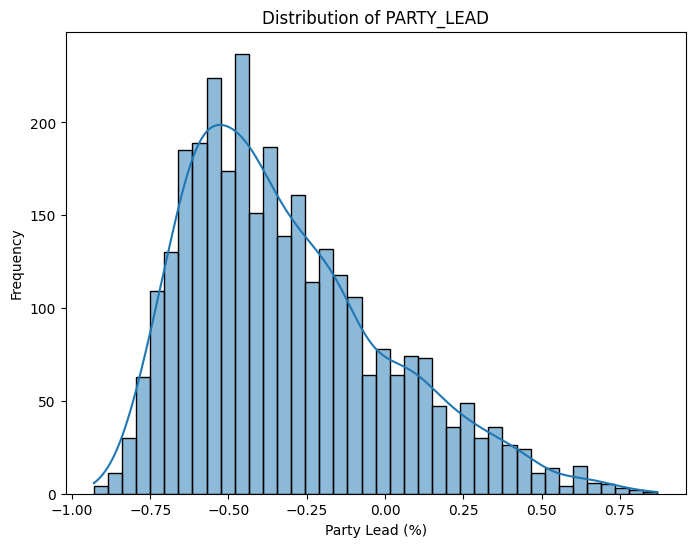

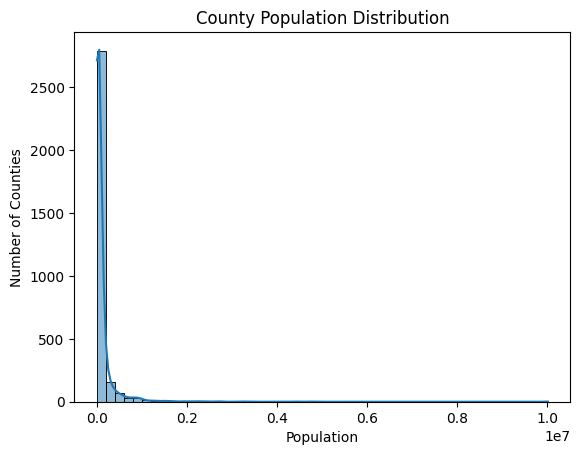

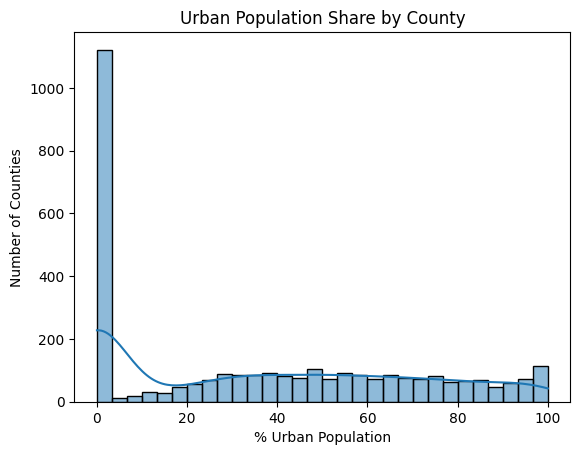

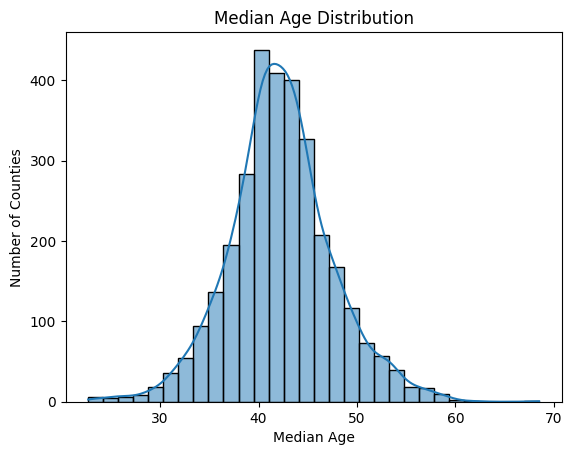

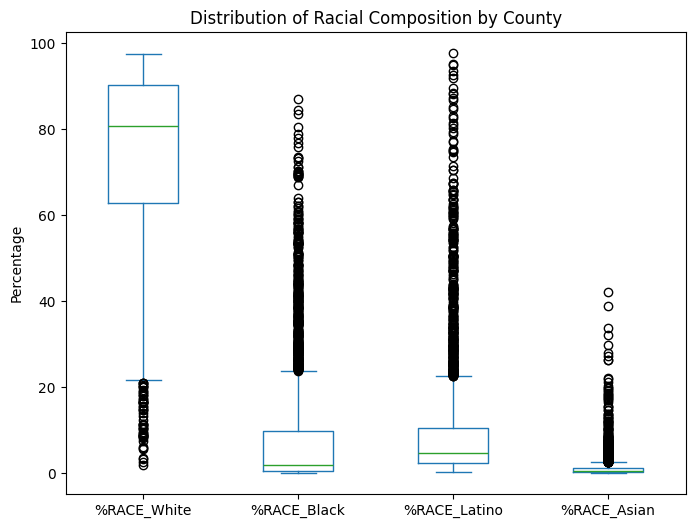

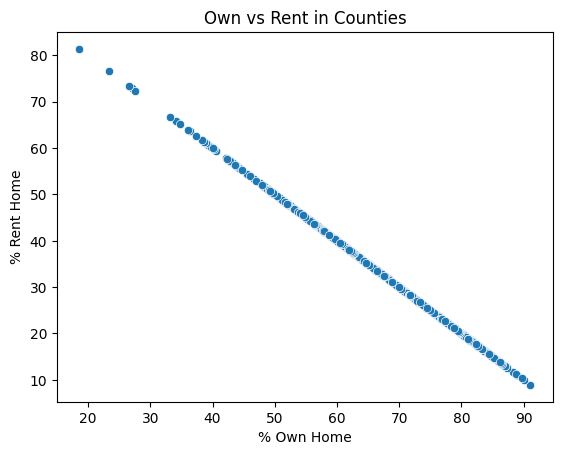

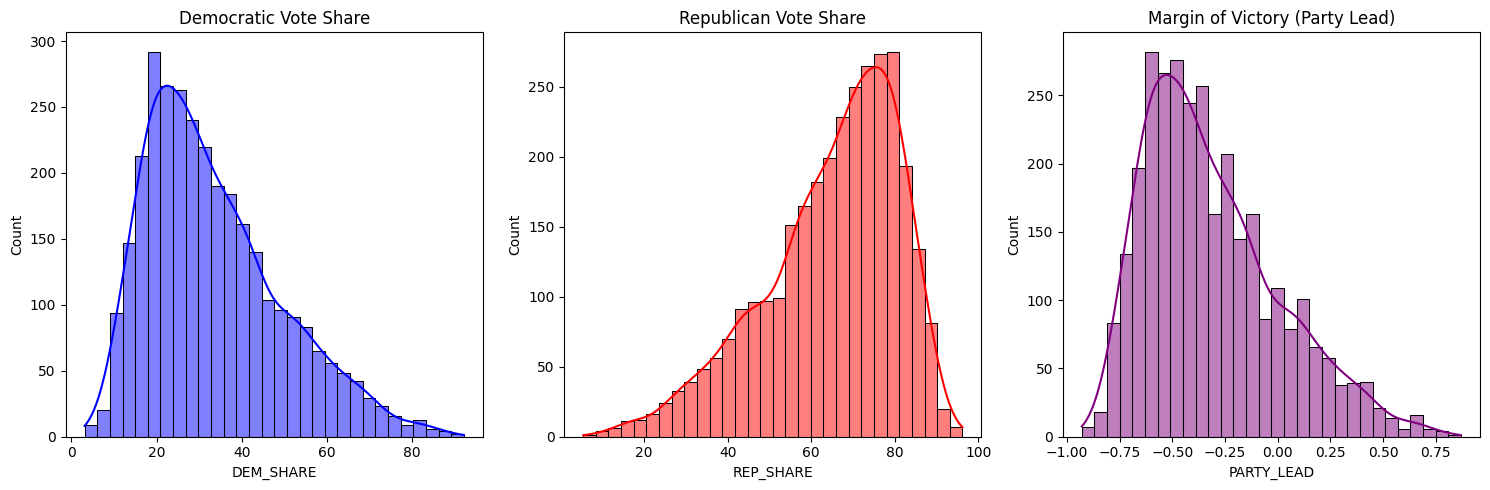

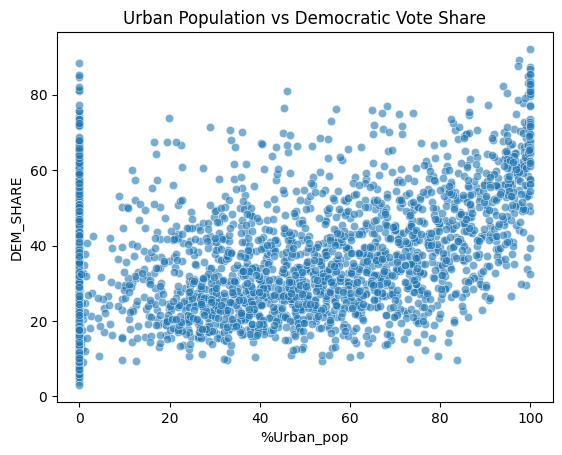

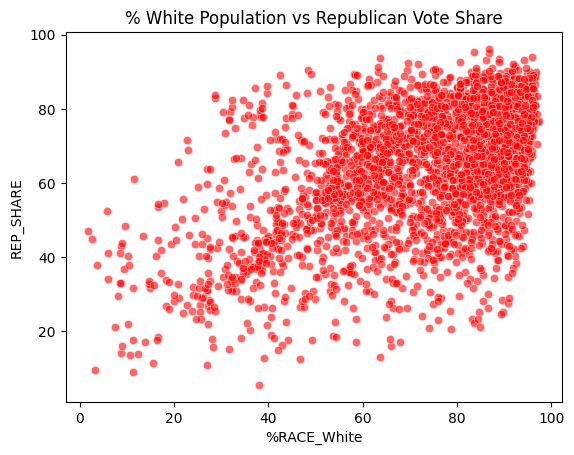

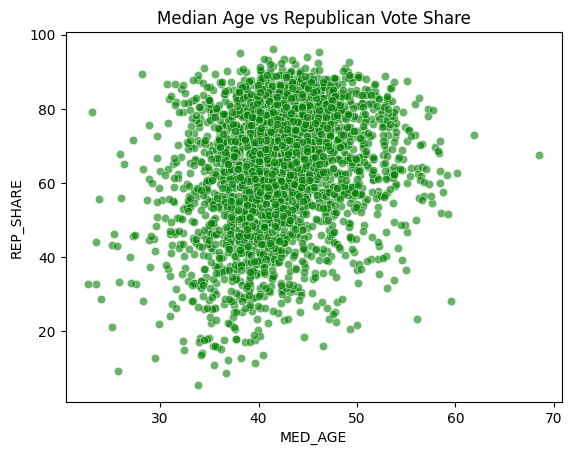

In [26]:
# Visualize the distribution of the target variable 'PARTY_WIN'
plt.figure(figsize=(6, 4))
sns.countplot(x='PARTY_WIN', data=MERGED_DF)
plt.title('Distribution of PARTY_WIN (0: Republican Win, 1: Democrat Win)')
plt.xlabel('Party Win')
plt.ylabel('Count')
plt.xticks([0, 1], ['Republican Win', 'Democrat Win'])
plt.show()

print("")
# Visualize the distribution of 'PARTY_LEAD'
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(MERGED_DF["DEM_SHARE"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Democratic Vote Share")
sns.histplot(MERGED_DF["REP_SHARE"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Republican Vote Share")
sns.histplot(MERGED_DF["PARTY_LEAD"], bins=30, kde=True, ax=axes[2], color="purple")
axes[2].set_title("Margin of Victory (Party Lead)")
plt.tight_layout()
plt.show()

print("")
sns.histplot(MERGED_DF["Pop_total"], bins=50, kde=True)
plt.title("County Population Distribution")
plt.xlabel("Population")
plt.ylabel("Number of Counties")
plt.show()

print("")
sns.histplot(MERGED_DF["%Urban_pop"], bins=30, kde=True)
plt.title("Urban Population Share by County")
plt.xlabel("% Urban Population")
plt.ylabel("Number of Counties")
plt.show()

print("")
sns.histplot(MERGED_DF["MED_AGE"], bins=30, kde=True)
plt.title("Median Age Distribution")
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.show()

print("")
race_cols = ["%RACE_White", "%RACE_Black", "%RACE_Latino", "%RACE_Asian"]
MERGED_DF[race_cols].plot(kind="box", figsize=(8,6))
plt.title("Distribution of Racial Composition by County")
plt.ylabel("Percentage")
plt.show()

print("")
sns.scatterplot(x="%OWN_HOME", y="%RENT_HOME", data=MERGED_DF)
plt.title("Own vs Rent in Counties")
plt.xlabel("% Own Home")
plt.ylabel("% Rent Home")
plt.show()

print("")
sns.scatterplot(x="%Urban_pop", y="DEM_SHARE", data=MERGED_DF, alpha=0.6)
plt.title("Urban Population vs Democratic Vote Share")
plt.show()

print("")
sns.scatterplot(x="%RACE_White", y="REP_SHARE", data=MERGED_DF, alpha=0.6, color="red")
plt.title("% White Population vs Republican Vote Share")
plt.show()

print("")
sns.scatterplot(x="MED_AGE", y="REP_SHARE", data=MERGED_DF, alpha=0.6, color="green")
plt.title("Median Age vs Republican Vote Share")
plt.show()

## Correlation checks on separated groups of features

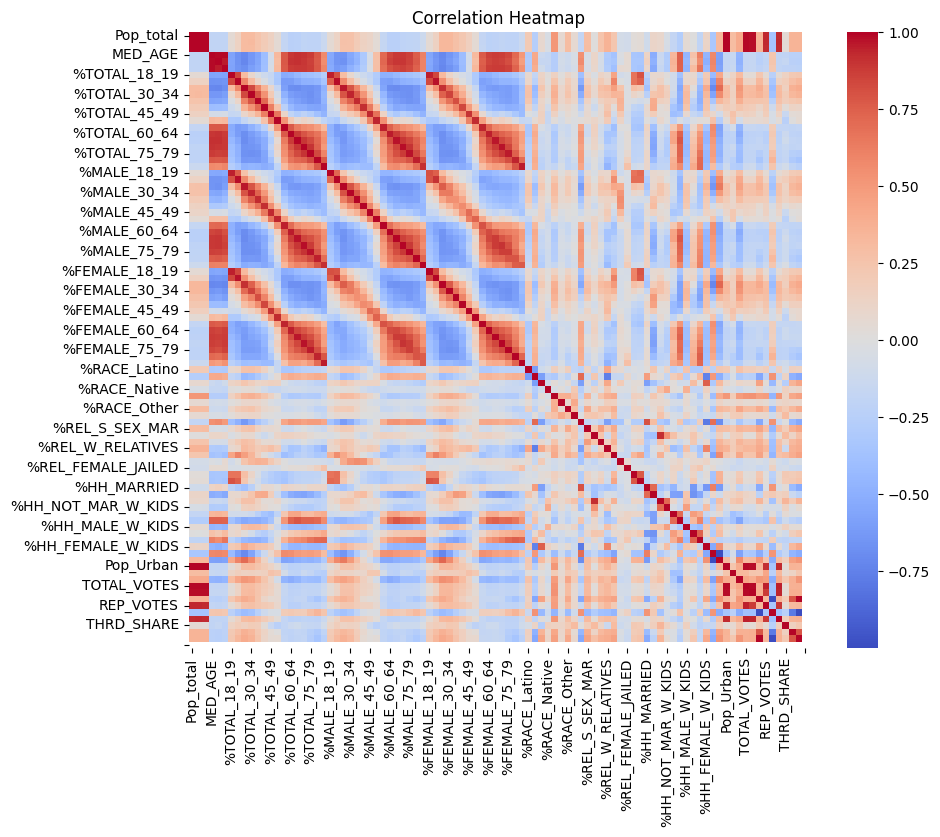

In [72]:
#corr_vars = ["Pop_total", "MED_AGE", "%Urban_pop",
#             "%RACE_White", "%RACE_Black", "%RACE_Latino",
#             "%OWN_HOME", "%RENT_HOME",
#             "DEM_SHARE", "REP_SHARE", "PARTY_LEAD"]

#corr = MERGED_DF[corr_vars].corr()
MERGED_num = MERGED_DF.select_dtypes(include=np.number)

corr = MERGED_num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

### Analyze Age data

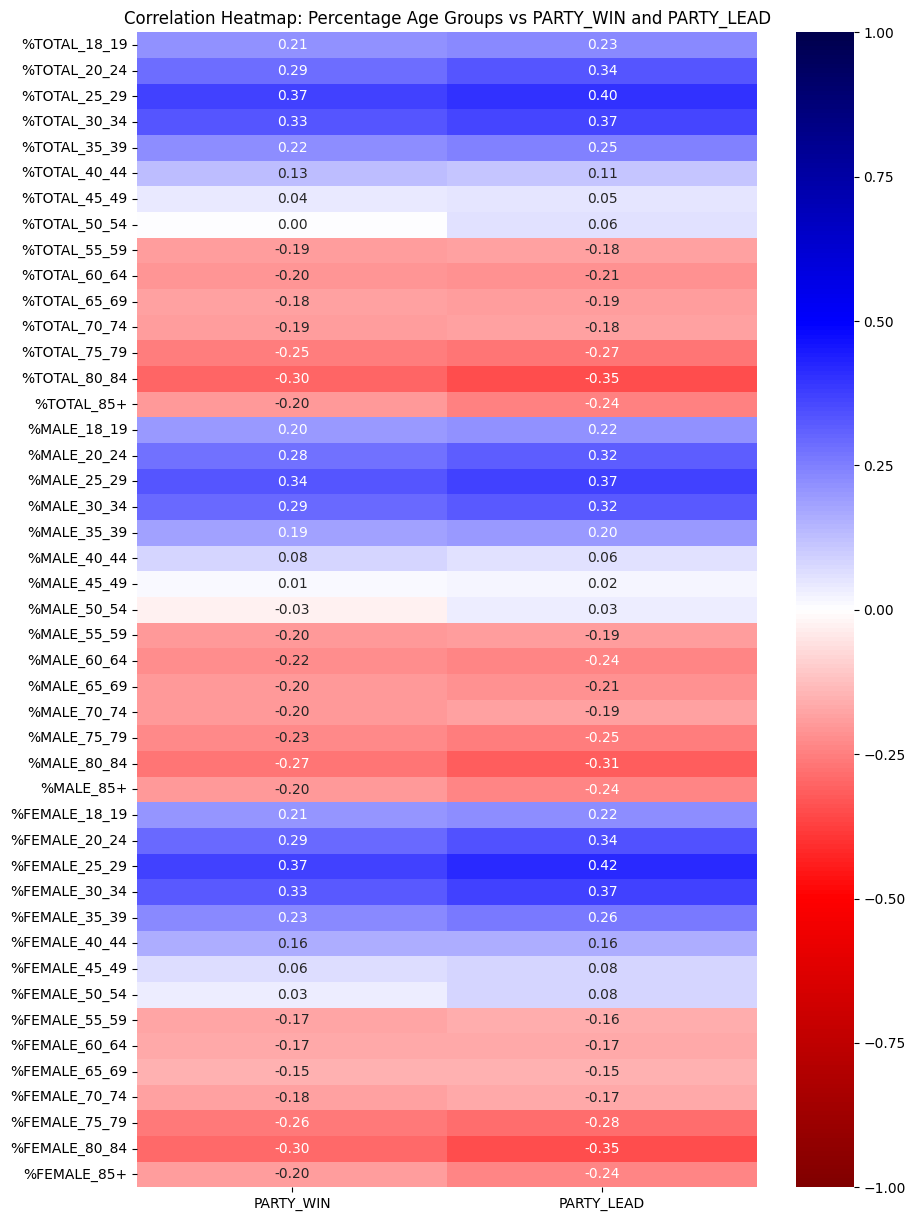

In [28]:
# Create new working dataframe
MERGED_trform = MERGED_DF.copy()

# Define column groups for total, male, and female age percentages
age_total_cols = [
    col for col in MERGED_trform.columns if col.startswith('%TOTAL_')]
age_male_cols  = [
    col for col in MERGED_trform.columns if col.startswith('%MALE_')]
age_female_cols = [
    col for col in MERGED_trform.columns if col.startswith('%FEMALE_')]

# Combine all percentage age columns and the target variables
features_for_age = age_total_cols + age_male_cols + age_female_cols + [
    'PARTY_WIN', 'PARTY_LEAD']

# Calculate the correlation matrix for the selected features
corr_age = MERGED_trform[features_for_age].corr()

# Select and display only the correlations with PARTY_WIN and PARTY_LEAD
corr_age_subset = corr_age[['PARTY_WIN', 'PARTY_LEAD']].loc[
    age_total_cols + age_male_cols + age_female_cols]

# Plot heatmap for better visualization of correlations
plt.figure(figsize=(10, 15)) # Adjust figure size as needed
sns.heatmap(corr_age_subset,
            cmap='seismic_r',
            annot=True, fmt=".2f",
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Percentage Age Groups vs PARTY_WIN and PARTY_LEAD')
plt.yticks(rotation=0)
plt.show()

#### With a clear divergence around age 55, compare 2 vs 3 age groupings  
- yng, mid, old: Looks to break groups into pos, neutral (between -0.1 and 0.1), neg  
- young, older: Looks to break age groups into positive and negative only  

In [29]:
# Define lists of age columns for young, middle (cutoff is |0.1|), and old
age_male_yng = [col for col in MERGED_trform.columns if col.startswith('%MALE_') and any(age in col for age in ['18_19', '20_24', '25_29', '30_34', '35_39'])]
age_male_mid = [col for col in MERGED_trform.columns if col.startswith('%MALE_') and any(age in col for age in ['40_44', '45_49', '50_54'])]
age_male_old = [col for col in MERGED_trform.columns if col.startswith('%MALE_') and any(age in col for age in ['55_59', '60_64', '65_69', '70_74', '75_79', '80_84', '85+'])]
age_female_yng = [col for col in MERGED_trform.columns if col.startswith('%FEMALE_') and any(age in col for age in ['18_19', '20_24', '25_29', '30_34', '35_39', '40_44'])]
age_female_mid = [col for col in MERGED_trform.columns if col.startswith('%FEMALE_') and any(age in col for age in ['45_49', '50_54'])]
age_female_old = [col for col in MERGED_trform.columns if col.startswith('%FEMALE_') and any(age in col for age in ['55_59', '60_64', '65_69', '70_74', '75_79', '80_84', '85+'])]

# Define lists of age columns for young (cutoff is 0) and older
age_male_young = [col for col in MERGED_trform.columns if col.startswith('%MALE_') and any(age in col for age in ['18_19', '20_24', '25_29', '30_34', '35_39', '40_44', '45_49'])]
age_male_older = [col for col in MERGED_trform.columns if col.startswith('%MALE_') and any(age in col for age in ['50_54', '55_59', '60_64', '65_69', '70_74', '75_79', '80_84', '85+'])]
age_female_young = [col for col in MERGED_trform.columns if col.startswith('%FEMALE_') and any(age in col for age in ['18_19', '20_24', '25_29', '30_34', '35_39', '40_44', '45_49', '50_54'])]
age_female_older = [col for col in MERGED_trform.columns if col.startswith('%FEMALE_') and any(age in col for age in ['55_59', '60_64', '65_69', '70_74', '75_79', '80_84', '85+'])]

# Calculate the new aggregated percentage age groups
MERGED_trform['%AGE_MALE_YNG'] = MERGED_trform[age_male_yng].sum(axis=1).round(2)
MERGED_trform['%AGE_MALE_MID'] = MERGED_trform[age_male_mid].sum(axis=1).round(2)
MERGED_trform['%AGE_MALE_OLD'] = MERGED_trform[age_male_old].sum(axis=1).round(2)
MERGED_trform['%AGE_MALE_YOUNG'] = MERGED_trform[age_male_young].sum(axis=1).round(2)
MERGED_trform['%AGE_MALE_OLDER'] = MERGED_trform[age_male_older].sum(axis=1).round(2)

MERGED_trform['%AGE_FEMALE_YNG'] = MERGED_trform[age_female_yng].sum(axis=1).round(2)
MERGED_trform['%AGE_FEMALE_MID'] = MERGED_trform[age_female_mid].sum(axis=1).round(2)
MERGED_trform['%AGE_FEMALE_OLD'] = MERGED_trform[age_female_old].sum(axis=1).round(2)
MERGED_trform['%AGE_FEMALE_YOUNG'] = MERGED_trform[age_female_young].sum(axis=1).round(2)
MERGED_trform['%AGE_FEMALE_OLDER'] = MERGED_trform[age_female_older].sum(axis=1).round(2)

# Confirm
print(MERGED_trform.info())
print(MERGED_trform.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Columns: 107 entries, GEOID to %AGE_FEMALE_OLDER
dtypes: float64(94), int64(10), object(3)
memory usage: 2.6+ MB
None
  GEOID    State          County  Pop_total  Male_total  Female_total  \
0  1001  Alabama  Autauga County      58805       28390         30415   
1  1003  Alabama  Baldwin County     231767      112627        119140   
2  1005  Alabama  Barbour County      25223       13167         12056   
3  1007  Alabama     Bibb County      22293       11798         10495   
4  1009  Alabama   Blount County      59134       29197         29937   

   MED_AGE  MED_AGE_M  MED_AGE_F  %TOTAL_18_19  ...  %AGE_MALE_YNG  \
0     38.9       37.9       40.0          2.61  ...          27.45   
1     44.0       42.6       45.3          2.34  ...          24.24   
2     42.9       41.3       45.0          2.39  ...          28.88   
3     40.5       39.8       41.7          2.19  ...          29.74   
4     41.1       40

### Analyze race groups

Correlation of Race/Ethnic Group Percentages with PARTY_WIN and PARTY_LEAD:


,PARTY_WIN,PARTY_LEAD
%RACE_White,-0.476608,-0.541320
%RACE_Asian,0.428341,0.464000
%RACE_Black,0.358541,0.445268
%RACE_Other,0.331116,0.416500
%RACE_Latino,0.163819,0.143768
%RACE_Native,0.093429,0.116583
%RACE_HI_PI,0.094966,0.089777
%RACE_Mixed,0.061594,0.089447


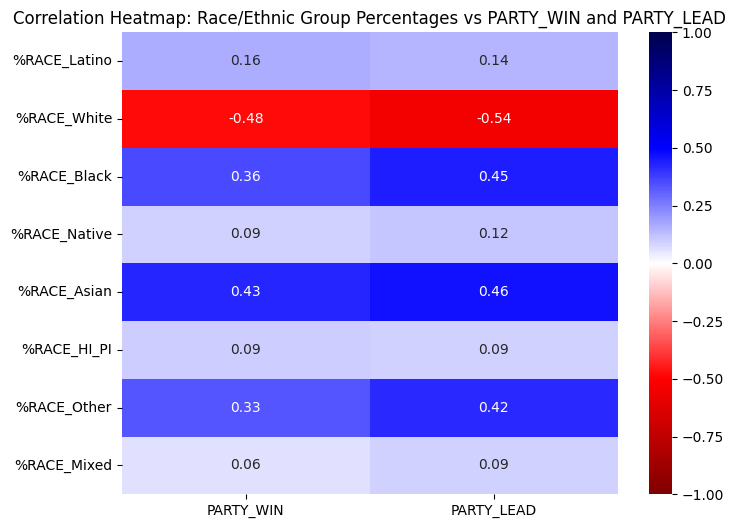

In [30]:
# Define the list of race percentage columns
race_cols = [col for col in MERGED_trform.columns if col.startswith('%RACE_')]

# Combine race percentage columns and the target variables
features_for_race = race_cols + ['PARTY_WIN', 'PARTY_LEAD']

# Calculate the correlation matrix
corr_race = MERGED_trform[features_for_race].corr()

# Select and display only the correlations with PARTY_WIN and PARTY_LEAD
corr_race_subset = corr_race[['PARTY_WIN', 'PARTY_LEAD']].loc[race_cols]

# Display the correlations
print("Correlation of Race/Ethnic Group Percentages with PARTY_WIN and PARTY_LEAD:")
display(corr_race_subset.sort_values(by='PARTY_LEAD', key=abs, ascending=False))

# Plot heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_race_subset, cmap='seismic_r', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Race/Ethnic Group Percentages vs PARTY_WIN and PARTY_LEAD')
plt.yticks(rotation=0)
plt.show()

With clear racial differences, I will try two variations of race groups  
- White and Non-White  
- White, strong political lean, more neutral lean

In [31]:
# Define lists to compare 2 groups: non-whites or with a cutoff of |0.2|
RACE_NonWhite = [col for col in MERGED_trform.columns if col.startswith('%RACE_') and any(race in col for race in ['Asian', 'Black', 'Other', 'Latino', 'Native', 'HI_PI', 'Mixed'])]
RACE_BAO = [col for col in MERGED_trform.columns if col.startswith('%RACE_') and any(race in col for race in ['Black', 'Asian', 'Other'])]
RACE_LNHM = [col for col in MERGED_trform.columns if col.startswith('%RACE_') and any(race in col for race in ['Latino', 'Native', 'HI_PI', 'Mixed'])]

# Calculate the new aggregated percentage race groups
MERGED_trform['%RACE_NonWhite'] = MERGED_trform[RACE_NonWhite].sum(axis=1).round(2)
MERGED_trform['%RACE_BAO'] = MERGED_trform[RACE_BAO].sum(axis=1).round(2)
MERGED_trform['%RACE_LNHM'] = MERGED_trform[RACE_LNHM].sum(axis=1).round(2)

### Analyze relationship groups

Correlation of Relationship Variables with PARTY_WIN and PARTY_LEAD:


,PARTY_WIN,PARTY_LEAD
%REL_OP_SEX_MAR,-0.447419,-0.536660
%REL_NON_REL,0.393126,0.453329
%REL_S_SEX_MAR,0.381575,0.442015
%REL_W_RELATIVES,0.370511,0.401299
%REL_S_SEX_UNMAR,0.327389,0.381049
%REL_OP_SEX_UNMAR,0.118780,0.281071
%REL_FEMALE_GRP_DORM,0.217188,0.257123
%REL_MALE_GRP_DORM,0.191598,0.225157
%REL_FEMALE_JAILED,-0.120008,-0.140276
%REL_MALE_JAILED,-0.028848,-0.048177


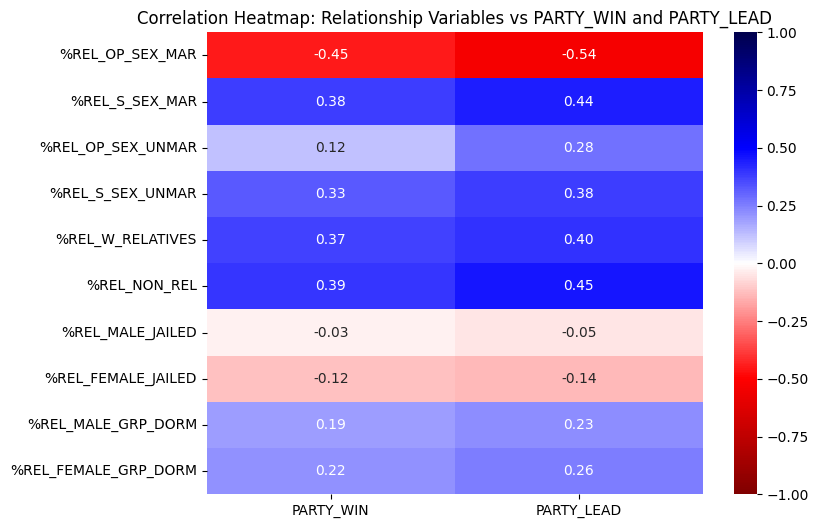

In [32]:
# Filter for columns starting with '%REL_'
rel_cols = [col for col in MERGED_trform.columns if col.startswith('%REL_')]

# Calculate the correlation of these columns with PARTY_WIN and PARTY_LEAD
corr_rel = MERGED_trform[rel_cols + ['PARTY_WIN', 'PARTY_LEAD']].corr()

# Select and display only the correlations with PARTY_WIN and PARTY_LEAD
corr_rel_subset = corr_rel[['PARTY_WIN', 'PARTY_LEAD']].loc[rel_cols]

# Display the correlations
print("Correlation of Relationship Variables with PARTY_WIN and PARTY_LEAD:")
display(corr_rel_subset.sort_values(by='PARTY_LEAD', key=abs, ascending=False))

# Optional: Visualize correlations as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_rel_subset,
            cmap='seismic_r',
            annot=True, fmt=".2f",
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Relationship Variables vs PARTY_WIN and PARTY_LEAD')
plt.yticks(rotation=0)
plt.show()

### Analyze household groups

Correlation of Household, Ownership, and Urban Variables with PARTY_WIN and PARTY_LEAD:


,PARTY_WIN,PARTY_LEAD
%HH_MARRIED,-0.421274,-0.525199
%OWN_HOME,-0.467484,-0.520625
%Urban_pop,0.381041,0.518369
%HH_FEMALE_W_KIDS,0.335575,0.416833
%HH_NOT_MAR,0.195899,0.354925
%HH_MALE_65+,-0.217852,-0.263460
%HH_FEMALE_ALONE,0.171864,0.237166
%HH_MAR_W_KIDS,-0.139495,-0.220450
%HH_FEMALE_65+,-0.173923,-0.180382
%HH_NOT_MAR_W_KIDS,-0.026599,0.054857


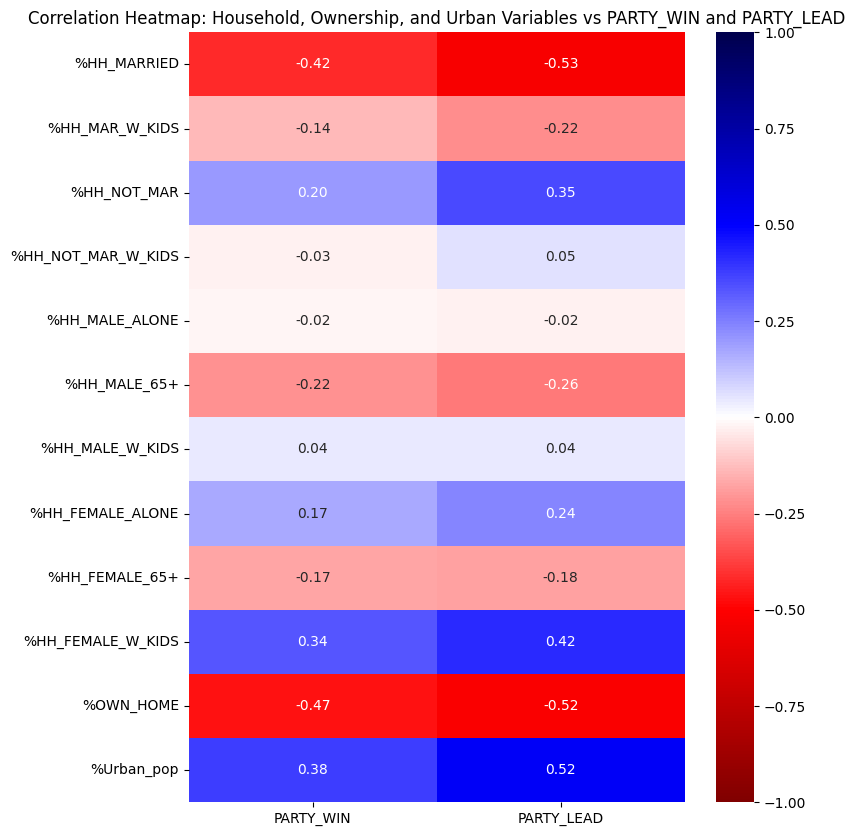

In [33]:
# Filter for columns starting with '%HH_'
hh_cols = [col for col in MERGED_trform.columns if col.startswith('%HH_')]

# Add own and urban columns
hh_cols.extend(['%OWN_HOME', '%Urban_pop'])

# Correlate these columns with PARTY_WIN and PARTY_LEAD
corr_hh = MERGED_trform[hh_cols + ['PARTY_WIN', 'PARTY_LEAD']].corr()

# Select and display only the correlations with PARTY_WIN and PARTY_LEAD
corr_hh_subset = corr_hh[['PARTY_WIN', 'PARTY_LEAD']].loc[hh_cols]

# Display the correlations
print("Correlation of Household, Ownership, and Urban Variables with PARTY_WIN and PARTY_LEAD:")
display(corr_hh_subset.sort_values(by='PARTY_LEAD', key=abs, ascending=False))

# Optional: Visualize correlations as a heatmap
plt.figure(figsize=(8, 10)) # Adjusted figure size
sns.heatmap(corr_hh_subset,
            cmap='seismic_r',
            annot=True, fmt=".2f",
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Household, Ownership, and Urban Variables vs PARTY_WIN and PARTY_LEAD')
plt.yticks(rotation=0)
plt.show()

## Save VOTE_DF

In [34]:
# List columns to keep (drop HH_totals, only keep M_total and F_total as ref)
columns_to_keep = [
    'GEOID', 'Male_total', 'Female_total', '%AGE_MALE_YNG', '%AGE_MALE_MID', '%AGE_MALE_OLD', '%AGE_MALE_YOUNG', '%AGE_MALE_OLDER', '%AGE_FEMALE_YNG', '%AGE_FEMALE_MID', '%AGE_FEMALE_OLD', '%AGE_FEMALE_YOUNG', '%AGE_FEMALE_OLDER', '%RACE_White', '%RACE_Black', '%RACE_Latino', '%RACE_Native', '%RACE_Asian', '%RACE_HI_PI', '%RACE_Other', '%RACE_Mixed', '%RACE_NonWhite', '%RACE_BAO', '%RACE_LNHM', '%REL_OP_SEX_MAR', '%REL_OP_SEX_UNMAR', '%REL_S_SEX_MAR', '%REL_S_SEX_UNMAR', '%REL_W_RELATIVES', '%REL_NON_REL', '%REL_MALE_JAILED', '%REL_FEMALE_JAILED', '%REL_MALE_GRP_DORM', '%REL_FEMALE_GRP_DORM', '%HH_MARRIED', '%HH_MAR_W_KIDS','%HH_NOT_MAR',  '%HH_NOT_MAR_W_KIDS', '%HH_MALE_ALONE', '%HH_MALE_65+', '%HH_MALE_W_KIDS', '%HH_FEMALE_ALONE', '%HH_FEMALE_65+', '%HH_FEMALE_W_KIDS', '%OWN_HOME', '%Urban_pop', 'PARTY_WIN', 'PARTY_LEAD']

# Create VOTE dataframe
VOTE_DF = MERGED_trform[columns_to_keep].copy()

VOTE_DF.to_csv('VOTE_DF.csv', index=False)

## EDA complete; dataframe cleaned, merged, transformed, partially reduced, and ready for analysis

# Feature analysis (with VOTE_DF)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.typing as npt
import statsmodels.api as sm
from typing import Literal, Tuple, Union
from scipy.stats import shapiro, mannwhitneyu, rankdata, norm
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.manova import MANOVA
from collections import Counter
#import plotly
#from sklearn import datasets
#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
#from scipy.stats import rankdata, ttest_ind
#from statsmodels.formula.api import ols
%matplotlib inline
print("Environment Ready")

Environment Ready


# Import VOTE_DF file here for analysis of features
(Looked at feature interactions as well, but opted to keep simple as few improved analytic scores)

In [36]:
VOTE_DF = pd.read_csv('VOTE_DF.csv')
# ensure GEOID is an object
VOTE_DF['GEOID'] = VOTE_DF['GEOID'].astype(str)

# Inspect
#print(VOTE_DF.info())

## Variance check

In [37]:
# Select numerical columns
VOTE_num = VOTE_DF.select_dtypes(include=np.number)

variances = VOTE_num.var()

# Sort variances in descending order
var_sorted = variances.sort_values(ascending=True)

# Set pandas display option to show float format
pd.set_option('display.float_format', '{:.2f}'.format)

# Confirm (Consider dropping features with low variance >0.05)
print("\nFeature Variances (sorted):")
print(var_sorted.head(20))


Feature Variances (sorted):
%REL_S_SEX_UNMAR       0.00
%REL_S_SEX_MAR         0.01
%RACE_Other            0.05
PARTY_LEAD             0.10
%HH_MALE_W_KIDS        0.14
PARTY_WIN              0.14
%RACE_HI_PI            0.21
%REL_OP_SEX_UNMAR      0.37
%REL_FEMALE_JAILED     0.50
%HH_NOT_MAR_W_KIDS     0.56
%REL_FEMALE_GRP_DORM   1.14
%REL_NON_REL           1.45
%REL_W_RELATIVES       1.67
%AGE_FEMALE_MID        1.68
%REL_MALE_GRP_DORM     1.70
%HH_MALE_65+           1.88
%HH_NOT_MAR            2.22
%RACE_Mixed            2.84
%HH_FEMALE_65+         2.88
%HH_FEMALE_W_KIDS      3.06
dtype: float64


## Compute VIF for VOTE_DF

In [38]:
# Remove independent variables
VOTE_features = VOTE_num.drop(columns=['PARTY_WIN', 'PARTY_LEAD'])

# Add constant
VOTE_features = sm.add_constant(VOTE_features)

# Compute Variance Inflation Factor for each feature
VOTE_VIF = pd.DataFrame()
VOTE_VIF['Feature'] = VOTE_features.columns
# Compute VIF, handling potential inf values which can occur with perfect multicollinearity
VOTE_VIF['VIF'] = [variance_inflation_factor(VOTE_features.values, i) for i in range(VOTE_features.shape[1])]

# Sort by VIF in descending order for easier analysis
VOTE_VIF = VOTE_VIF.sort_values(by='VIF', ascending=False)

# Set display to show float format
pd.set_option('display.float_format', '{:.2f}'.format)

print("VIF for VOTE_DF:")
display(VOTE_VIF)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF for VOTE_DF:


,Feature,VIF
10,%AGE_FEMALE_OLD,inf
12,%AGE_FEMALE_OLDER,inf
22,%RACE_BAO,inf
23,%RACE_LNHM,inf
21,%RACE_NonWhite,inf
14,%RACE_Black,19096603001.58
15,%RACE_Latino,17244071353.96
16,%RACE_Native,4664876054.77
11,%AGE_FEMALE_YOUNG,1470311570.32
8,%AGE_FEMALE_YNG,1447571687.48


# Correlations

## Pearson Correlation Matrix

In [39]:
# Compute Pearson correlation matrix
pearson_corr_matrix = VOTE_DF.corr(method='pearson')

# Display the correlations
print("Pearson Correlation Matrix:")
display(pearson_corr_matrix)

# Sort Pearson correlations with PARTY_WIN and PARTY_LEAD
pearson_corr_win = pearson_corr_matrix['PARTY_WIN'].sort_values(ascending=False)
pearson_corr_lead = pearson_corr_matrix['PARTY_LEAD'].sort_values(ascending=False)

Pearson Correlation Matrix:


,GEOID,Male_total,Female_total,%AGE_MALE_YNG,%AGE_MALE_MID,%AGE_MALE_OLD,%AGE_MALE_YOUNG,%AGE_MALE_OLDER,%AGE_FEMALE_YNG,%AGE_FEMALE_MID,...,%HH_MALE_ALONE,%HH_MALE_65+,%HH_MALE_W_KIDS,%HH_FEMALE_ALONE,%HH_FEMALE_65+,%HH_FEMALE_W_KIDS,%OWN_HOME,%Urban_pop,PARTY_WIN,PARTY_LEAD
GEOID,1.00,-0.06,-0.06,-0.03,-0.05,0.05,-0.04,0.05,-0.04,-0.03,...,-0.02,0.02,-0.05,-0.04,0.01,-0.13,0.06,-0.02,-0.04,-0.06
Male_total,-0.06,1.00,1.00,0.23,0.12,-0.24,0.25,-0.23,0.29,0.12,...,-0.17,-0.28,0.05,-0.00,-0.20,0.12,-0.33,0.41,0.35,0.36
Female_total,-0.06,1.00,1.00,0.23,0.12,-0.24,0.25,-0.23,0.29,0.12,...,-0.17,-0.28,0.05,0.01,-0.19,0.12,-0.33,0.41,0.36,0.36
%AGE_MALE_YNG,-0.03,0.23,0.23,1.00,0.04,-0.80,0.97,-0.82,0.86,-0.15,...,-0.13,-0.56,0.23,0.04,-0.41,0.35,-0.68,0.52,0.35,0.40
%AGE_MALE_MID,-0.05,0.12,0.12,0.04,1.00,-0.27,0.27,-0.18,0.02,0.73,...,-0.31,-0.29,0.07,-0.13,-0.18,0.14,0.10,0.07,0.03,0.05
%AGE_MALE_OLD,0.05,-0.24,-0.24,-0.80,-0.27,1.00,-0.85,0.99,-0.83,-0.06,...,0.42,0.80,-0.44,0.25,0.61,-0.51,0.56,-0.50,-0.25,-0.27
%AGE_MALE_YOUNG,-0.04,0.25,0.25,0.97,0.27,-0.85,1.00,-0.84,0.83,-0.00,...,-0.20,-0.61,0.25,-0.01,-0.45,0.37,-0.62,0.51,0.34,0.38
%AGE_MALE_OLDER,0.05,-0.23,-0.23,-0.82,-0.18,0.99,-0.84,1.00,-0.84,0.03,...,0.39,0.78,-0.44,0.24,0.60,-0.50,0.58,-0.50,-0.25,-0.26
%AGE_FEMALE_YNG,-0.04,0.29,0.29,0.86,0.02,-0.83,0.83,-0.84,1.00,-0.10,...,-0.22,-0.70,0.27,-0.05,-0.56,0.39,-0.71,0.60,0.39,0.43
%AGE_FEMALE_MID,-0.03,0.12,0.12,-0.15,0.73,-0.06,-0.00,0.03,-0.10,1.00,...,-0.35,-0.22,-0.04,-0.15,-0.16,0.12,0.19,0.04,0.06,0.10


## Spearman Correlation Matrix

In [40]:
# Compute Spearman correlation matrix
spearman_corr_matrix = VOTE_DF.corr(method='spearman')

# Display the correlations
print("\nSpearman Correlation Matrix:")
display(spearman_corr_matrix)

# Sort and store Spearman correlation results
spearman_corr_win = spearman_corr_matrix['PARTY_WIN'].sort_values(ascending=False)
spearman_corr_lead = spearman_corr_matrix['PARTY_LEAD'].sort_values(ascending=False)


Spearman Correlation Matrix:


,GEOID,Male_total,Female_total,%AGE_MALE_YNG,%AGE_MALE_MID,%AGE_MALE_OLD,%AGE_MALE_YOUNG,%AGE_MALE_OLDER,%AGE_FEMALE_YNG,%AGE_FEMALE_MID,...,%HH_MALE_ALONE,%HH_MALE_65+,%HH_MALE_W_KIDS,%HH_FEMALE_ALONE,%HH_FEMALE_65+,%HH_FEMALE_W_KIDS,%OWN_HOME,%Urban_pop,PARTY_WIN,PARTY_LEAD
GEOID,1.00,-0.02,-0.02,-0.06,-0.05,0.07,-0.06,0.07,-0.06,-0.02,...,-0.02,0.03,-0.06,-0.04,-0.01,-0.13,0.06,-0.02,-0.03,-0.07
Male_total,-0.02,1.00,1.00,0.55,0.30,-0.49,0.57,-0.47,0.60,0.25,...,-0.44,-0.63,0.15,0.00,-0.33,0.35,-0.40,0.79,0.32,0.52
Female_total,-0.02,1.00,1.00,0.52,0.28,-0.48,0.55,-0.45,0.60,0.25,...,-0.44,-0.63,0.14,0.02,-0.32,0.35,-0.40,0.79,0.32,0.52
%AGE_MALE_YNG,-0.06,0.55,0.52,1.00,0.19,-0.86,0.97,-0.86,0.85,-0.02,...,-0.23,-0.64,0.34,-0.02,-0.45,0.53,-0.64,0.59,0.34,0.38
%AGE_MALE_MID,-0.05,0.30,0.28,0.19,1.00,-0.27,0.36,-0.19,0.18,0.77,...,-0.35,-0.31,0.10,-0.16,-0.20,0.20,0.05,0.11,0.04,0.06
%AGE_MALE_OLD,0.07,-0.49,-0.48,-0.86,-0.27,1.00,-0.88,0.99,-0.88,-0.06,...,0.42,0.80,-0.45,0.24,0.62,-0.59,0.55,-0.53,-0.26,-0.26
%AGE_MALE_YOUNG,-0.06,0.57,0.55,0.97,0.36,-0.88,1.00,-0.86,0.84,0.10,...,-0.28,-0.67,0.33,-0.06,-0.48,0.51,-0.59,0.58,0.33,0.36
%AGE_MALE_OLDER,0.07,-0.47,-0.45,-0.86,-0.19,0.99,-0.86,1.00,-0.88,0.02,...,0.39,0.78,-0.45,0.23,0.60,-0.58,0.56,-0.53,-0.26,-0.25
%AGE_FEMALE_YNG,-0.06,0.60,0.60,0.85,0.18,-0.88,0.84,-0.88,1.00,0.04,...,-0.35,-0.77,0.37,-0.14,-0.60,0.56,-0.64,0.64,0.35,0.38
%AGE_FEMALE_MID,-0.02,0.25,0.25,-0.02,0.77,-0.06,0.10,0.02,0.04,1.00,...,-0.36,-0.22,-0.03,-0.18,-0.18,0.14,0.14,0.04,0.06,0.08


## Chatterjee's Correlation  
In 2020, a paper titled "A New Coefficient of Correlation" introduced a new coefficient measure ξ (“Xi”) which measures how much the dependent variable is a function of the independent. The result equals 0 if the two variables are independent and will be closer to 1 as the relationship strengthens. Also includes some theoretical properties that allow for hypothesis testing prior to making assumptions about the data.  

Along with the article, the R package "XICOR" was released which contains the function xicor() which calculates ξ when X and Y vectors or matrices are provided (provides p-values for hypothesis testing).

S. Chatterjee, *A New Coefficient of Correlation* (2020), Journal of the American Statistical Association.
https://doi.org/10.48550/arXiv.1909.10140

The below code is a python xicor function based on one written by Tim Sumner https://medium.com/data-science/a-new-coefficient-of-correlation-64ae4f260310

In [41]:
# Compute Chatterjee's Correlation
def xicor(X, Y, ties="auto", return_p=True):
    np.random.seed(1)
    X = np.asarray(X)
    Y = np.asarray(Y)
    Y_sorted = Y[np.argsort(X)]
    n = len(X)

    if ties == "auto":
        ties = len(np.unique(Y)) < n

    if ties:
        r = rankdata(Y_sorted, method='ordinal')
        l = rankdata(Y_sorted, method='max')
        xi = 1 - n * np.sum(np.abs(np.diff(r))) / (2 * np.sum(l * (n - l)))
    else:
        r = rankdata(Y_sorted, method='ordinal')
        xi = 1 - 3 * np.sum(np.abs(np.diff(r))) / (n**2 - 1)

# p-value approximation
    p_value = norm.sf(xi, scale=2/5/np.sqrt(n))

    if return_p:
        return xi, p_value
    else:
        return xi

# Define the independent and dependent variables
features = [col for col in VOTE_DF.columns if col not in [
    'PARTY_WIN', 'PARTY_LEAD',
    'Male_total', 'Female_total']]

target_win = VOTE_DF['PARTY_WIN']
target_lead = VOTE_DF['PARTY_LEAD']

# Store xicor results
xicor_results_win = {}
xicor_results_lead = {}

# Compute xicor for each feature against PARTY_WIN
for feature in features:
    x_data = VOTE_DF[feature]
    xi_stat, xi_p_value = xicor(x_data, target_win)
    xicor_results_win[feature] = {'statistic': xi_stat, 'p_value': xi_p_value}
    #print(f"{feature}: Statistic={xi_stat:.2f}, P-value={xi_p_value:.2f}")

# Compute xicor for each feature against PARTY_LEAD
for feature in features:
    x_data = VOTE_DF[feature]
    xi_stat, xi_p_value = xicor(x_data, target_lead)
    xicor_results_lead[feature] = {'statistic': xi_stat, 'p_value': xi_p_value}
    #print(f"{feature}: Statistic={xi_stat:.2f}, P-value={xi_p_value:.2f}")

# Store Chatterjee correlation results
xi_corr_win = pd.DataFrame.from_dict(xicor_results_win, orient='index')
xi_corr_lead = pd.DataFrame.from_dict(xicor_results_lead, orient='index')

## Compare Correlation Coefficients

In [42]:
# Combine all correlation results into a single DataFrame
correlation_comparison = pd.concat([
    xi_corr_lead['statistic'].rename('Xi_Corr_LEAD'),
    xi_corr_win['statistic'].rename('Xi_Corr_WIN'),
    pearson_corr_lead,
    pearson_corr_win,
    spearman_corr_lead,
    spearman_corr_win,
], axis=1)

# Remove the target variables  if included
correlation_comparison.drop(['PARTY_WIN', 'PARTY_LEAD'], errors='ignore', inplace=True)

# Rename features
Correlation_Table = correlation_comparison.rename(columns={
    'Pearson_Corr_PARTY_LEAD': 'Pearson_LEAD',
    'Pearson_Corr_PARTY_WIN': 'Pearson_WIN',
    'Spearman_Corr_PARTY_LEAD': 'Spearman_LEAD',
    'Spearman_Corr_PARTY_WIN': 'Spearman_WIN'})

# Display all correlations
print("Comparison of Xi, Pearson, and Spearman Correlations:")
display(Correlation_Table.round(4).sort_values(by='Xi_Corr_LEAD', ascending=False))

Comparison of Xi, Pearson, and Spearman Correlations:


,Xi_Corr_LEAD,Xi_Corr_WIN,PARTY_LEAD,PARTY_WIN,PARTY_LEAD,PARTY_WIN
%RACE_Asian,0.28,0.72,0.46,0.43,0.55,0.37
%Urban_pop,0.27,0.71,0.52,0.38,0.52,0.36
GEOID,0.25,0.55,-0.06,-0.04,-0.07,-0.03
%REL_S_SEX_MAR,0.24,0.68,0.44,0.38,0.43,0.38
%RACE_Other,0.24,0.66,0.42,0.33,0.44,0.31
%REL_S_SEX_UNMAR,0.23,0.62,0.38,0.33,0.36,0.32
%REL_FEMALE_GRP_DORM,0.21,0.61,0.26,0.22,0.41,0.26
%RACE_BAO,0.21,0.70,0.53,0.44,0.51,0.35
%REL_NON_REL,0.20,0.67,0.45,0.39,0.39,0.31
%REL_MALE_GRP_DORM,0.20,0.62,0.23,0.19,0.42,0.27


# Statistical test (Test for normality first)  


In [43]:
# Separate the dataframe into two groups based on PARTY_WIN
group_Republican = VOTE_num[VOTE_num['PARTY_WIN'] == 0]
group_Democrat = VOTE_num[VOTE_num['PARTY_WIN'] == 1]

features_for_norm = VOTE_num.columns.tolist()
features_for_norm.remove('PARTY_WIN')

normality_results = {}

for feature in features_for_norm:
    data1 = group_Republican[feature]
    data2 = group_Democrat[feature]

    if len(data1) > 2 and len(data2) > 2:
        stat1, p_norm1 = shapiro(data1)
        stat2, p_norm2 = shapiro(data2)

        normality_results[feature] = {
            'Rep_p': f"{p_norm1:.2f}",
            'Dem_p': f"{p_norm2:.2f}"}
    else:
        normality_results[feature] = {
            'Rep_p': None,
            'Dem_p': None}

# Convert to DataFrame
normality_df = pd.DataFrame(normality_results).T

# Confirm (Normality will be defined as above a threshhold of 0.05)
print(normality_df)

                     Rep_p Dem_p
Male_total            0.00  0.00
Female_total          0.00  0.00
%AGE_MALE_YNG         0.00  0.00
%AGE_MALE_MID         0.00  0.00
%AGE_MALE_OLD         0.00  0.00
%AGE_MALE_YOUNG       0.00  0.00
%AGE_MALE_OLDER       0.00  0.00
%AGE_FEMALE_YNG       0.00  0.00
%AGE_FEMALE_MID       0.00  0.00
%AGE_FEMALE_OLD       0.00  0.00
%AGE_FEMALE_YOUNG     0.00  0.00
%AGE_FEMALE_OLDER     0.00  0.00
%RACE_White           0.00  0.00
%RACE_Black           0.00  0.00
%RACE_Latino          0.00  0.00
%RACE_Native          0.00  0.00
%RACE_Asian           0.00  0.00
%RACE_HI_PI           0.00  0.00
%RACE_Other           0.00  0.00
%RACE_Mixed           0.00  0.00
%RACE_NonWhite        0.00  0.00
%RACE_BAO             0.00  0.00
%RACE_LNHM            0.00  0.00
%REL_OP_SEX_MAR       0.00  0.01
%REL_OP_SEX_UNMAR     0.00  0.00
%REL_S_SEX_MAR        0.00  0.00
%REL_S_SEX_UNMAR      0.00  0.00
%REL_W_RELATIVES      0.00  0.00
%REL_NON_REL          0.00  0.00
%REL_MALE_

> Almost every feature is way below 0.05 in both groups: normality is violated with one exception: Will not use T-test.

## Run Mann-Whitney U Test

In [44]:
mannwhit_results = []

for feature in features_for_norm:
    if feature == 'PARTY_LEAD':
        continue

    data1 = group_Republican[feature]
    data2 = group_Democrat[feature]

    if len(data1) < 2 or len(data2) < 2:
        continue

    U_stat, p_value = mannwhitneyu(data1, data2, alternative="two-sided")

    if p_value < 0.05:
        mannwhit_results.append({
            'Feature': feature,
            'DEM_median': data2.median(),
            'REP_median': data1.median(),
            'U_stat': U_stat,
            'p_value': p_value,
            'n_dem': len(data2),
            'n_rep': len(data1)})

mannwhit_df = pd.DataFrame(mannwhit_results)

# Derive additional stats
mannwhit_df['diff_median'] = mannwhit_df['DEM_median'] - mannwhit_df['REP_median']

mannwhit_df['R_biserial'] = 1 - (2 * mannwhit_df['U_stat'] / (
                            mannwhit_df['n_dem'] * mannwhit_df['n_rep']))

mannwhit_df['Cohens_d'] = (2 * mannwhit_df['R_biserial']
                          ) / np.sqrt(1 - mannwhit_df['R_biserial']**2)

# Add qualitative labels
def label_effect_size(d):
    d = abs(d)
    if d < 0.2:
        return "Negligible"
    elif d < 0.5:
        return "Small"
    elif d < 0.8:
        return "Medium"
    else:
        return "Large"

mannwhit_df['Effect_size'] = mannwhit_df['Cohens_d'].astype(float).apply(label_effect_size)

# Reorder columns for priority in table (consider dropping n_ features)
cols = mannwhit_df.columns.tolist()
cols.insert(3, cols.pop(cols.index('diff_median')))
cols.insert(5, cols.pop(cols.index('Cohens_d')))
cols.insert(6, cols.pop(cols.index('Effect_size')))
cols.insert(7, cols.pop(cols.index('R_biserial')))
mannwhit_df = mannwhit_df[cols]

# Format after sorting
mannwhit_df['DEM_median'] = mannwhit_df['DEM_median'].map(lambda x: f"{x:.2f}")
mannwhit_df['REP_median'] = mannwhit_df['REP_median'].map(lambda x: f"{x:.2f}")
mannwhit_df['diff_median'] = mannwhit_df['diff_median'].map(lambda x: f"{x:.2f}")
mannwhit_df['Cohens_d'] = mannwhit_df['Cohens_d'].map(lambda x: f"{x:.2f}")
mannwhit_df['R_biserial'] = mannwhit_df['R_biserial'].map(lambda x: f"{x:.2f}")
mannwhit_df['p_value'] = mannwhit_df['p_value'].map(lambda x: f"{x:.2f}")

# Confirm
display(mannwhit_df.sort_values(by='Cohens_d', ascending=False))

,Feature,DEM_median,REP_median,diff_median,U_stat,Cohens_d,Effect_size,R_biserial,p_value,n_dem,n_rep
20,%RACE_NonWhite,46.00,15.90,30.10,271565.50,1.56,Large,0.61,0.00,546,2580
16,%RACE_Asian,2.10,0.50,1.60,304641.00,1.38,Large,0.57,0.00,546,2580
10,%AGE_FEMALE_YOUNG,46.30,41.59,4.71,319990.50,1.30,Large,0.55,0.00,546,2580
21,%RACE_BAO,16.30,2.80,13.50,331246.50,1.25,Large,0.53,0.00,546,2580
42,%Urban_pop,77.61,27.29,50.32,330810.00,1.25,Large,0.53,0.00,546,2580
7,%AGE_FEMALE_YNG,33.92,29.40,4.52,333901.50,1.24,Large,0.53,0.00,546,2580
2,%AGE_MALE_YNG,29.54,25.05,4.49,337918.50,1.22,Large,0.52,0.00,546,2580
5,%AGE_MALE_YOUNG,41.58,36.94,4.64,350370.50,1.16,Large,0.50,0.00,546,2580
25,%REL_S_SEX_MAR,0.20,0.10,0.10,355853.50,1.14,Large,0.49,0.00,546,2580
1,Female_total,60856.00,11135.50,49720.50,360779.50,1.12,Large,0.49,0.00,546,2580


# Feature importance

## Feature Importance for PARTY_WIN from Logistic Regression

Feature Importance (Coefficients from Regularized Logistic Regression):
%HH_NOT_MAR             2.63
%HH_MAR_W_KIDS          2.61
%AGE_FEMALE_OLDER       1.79
%AGE_FEMALE_OLD         1.79
%AGE_MALE_YOUNG         1.16
%HH_FEMALE_W_KIDS       1.12
%AGE_MALE_OLD           0.95
%RACE_Native            0.84
%RACE_NonWhite          0.83
%AGE_FEMALE_YOUNG       0.64
%RACE_BAO               0.64
%RACE_Black             0.55
%AGE_FEMALE_YNG         0.55
%RACE_Asian             0.54
%OWN_HOME               0.51
%REL_S_SEX_MAR          0.50
%HH_FEMALE_ALONE        0.48
%RACE_LNHM              0.48
%REL_OP_SEX_UNMAR       0.46
%AGE_FEMALE_MID         0.39
%HH_MALE_W_KIDS         0.39
%REL_NON_REL            0.27
%REL_FEMALE_GRP_DORM    0.22
%Urban_pop              0.20
%AGE_MALE_YNG           0.20
%RACE_Latino            0.17
%RACE_HI_PI             0.14
%AGE_MALE_OLDER         0.13
%AGE_MALE_MID           0.10
%RACE_Other             0.06
%REL_S_SEX_UNMAR       -0.07
%HH_MALE_ALONE         -0.10


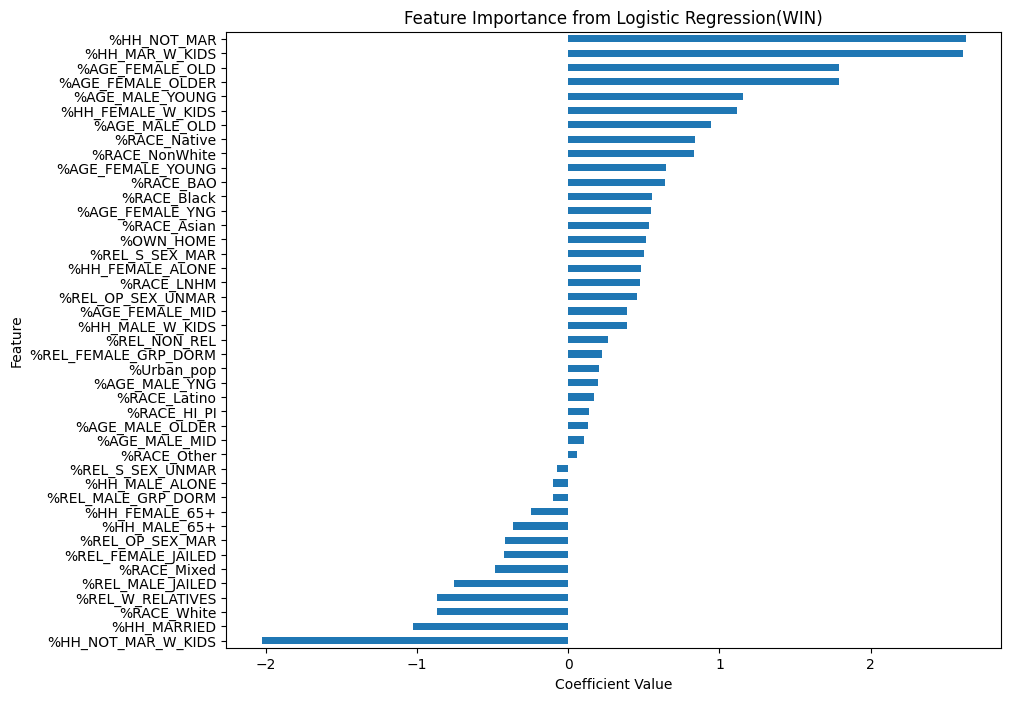


Logistic Regression Model Evaluation (on test set):
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       517
           1       0.67      0.89      0.76       109

    accuracy                           0.90       626
   macro avg       0.82      0.90      0.85       626
weighted avg       0.92      0.90      0.91       626

Confusion Matrix:
[[469  48]
 [ 12  97]]


In [45]:
# Define the features to exclude based on p-values
# Could drop Same_Sex features, but not ready to drop yet
features_to_exclude = ['']

# Select features for logistic regression, excluding the specified ones
features_for_logit = [col for col in VOTE_DF.columns if col not in features_to_exclude + ['GEOID', 'Male_total', 'Female_total', 'PARTY_WIN', 'PARTY_LEAD']]

X0 = VOTE_DF[features_for_logit]
y0 = VOTE_DF['PARTY_WIN']

# Split data into training and testing sets (recommended for model evaluation)
X0_train, X0_test, y0_train, y0_test = train_test_split(
    X0, y0, test_size=0.2, random_state=1,
    stratify=y0) # To maintain class distribution

# Standardize the features
scaler = StandardScaler()
X0_train_scaled = scaler.fit_transform(X0_train)
X0_test_scaled = scaler.transform(X0_test)

# Initialize and train the Logistic Regression model with regularization
# Using default L2 penalty and balanced class weight
logit_model_sklearn = LogisticRegression(
    random_state=1,
    class_weight='balanced',
    max_iter=1000) # Increased max_iter for convergence
logit_model_sklearn.fit(X0_train_scaled, y0_train)

# Confirm feature importances from the trained model (coefficients)
print("Feature Importance (Coefficients from Regularized Logistic Regression):")
logit_feature_importance = pd.Series(
    logit_model_sklearn.coef_[0], index=features_for_logit)
print(logit_feature_importance.sort_values(ascending=False))

# Plot feature importances
plt.figure(figsize=(10, 8)) # Adjusted figure size for better readability
logit_feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance from Logistic Regression(WIN)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Evaluate the model on the test set
y0_pred_logit = logit_model_sklearn.predict(X0_test_scaled)

print("\nLogistic Regression Model Evaluation (on test set):")
print(f"Accuracy: {accuracy_score(y0_test, y0_pred_logit):.2f}")
print("Classification Report:")
print(classification_report(y0_test, y0_pred_logit))
print("Confusion Matrix:")
print(confusion_matrix(y0_test, y0_pred_logit))

## Feature Importance for PARTY_WIN from Decision Tree Classifier

Decision Tree Regressor Model Evaluation (on test set):
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.29
Mean Absolute Error (MAE): 0.09
R-squared (R2): 0.41

Feature Importance from Decision Tree Regressor:
%Urban_pop             0.34
%RACE_BAO              0.22
%REL_S_SEX_MAR         0.12
%RACE_LNHM             0.07
%REL_OP_SEX_MAR        0.06
%REL_NON_REL           0.06
%RACE_Asian            0.05
%REL_FEMALE_GRP_DORM   0.04
%HH_MARRIED            0.01
%RACE_Other            0.01
%AGE_MALE_OLD          0.01
%REL_MALE_GRP_DORM     0.00
%RACE_White            0.00
%REL_OP_SEX_UNMAR      0.00
%AGE_FEMALE_OLDER      0.00
dtype: float64


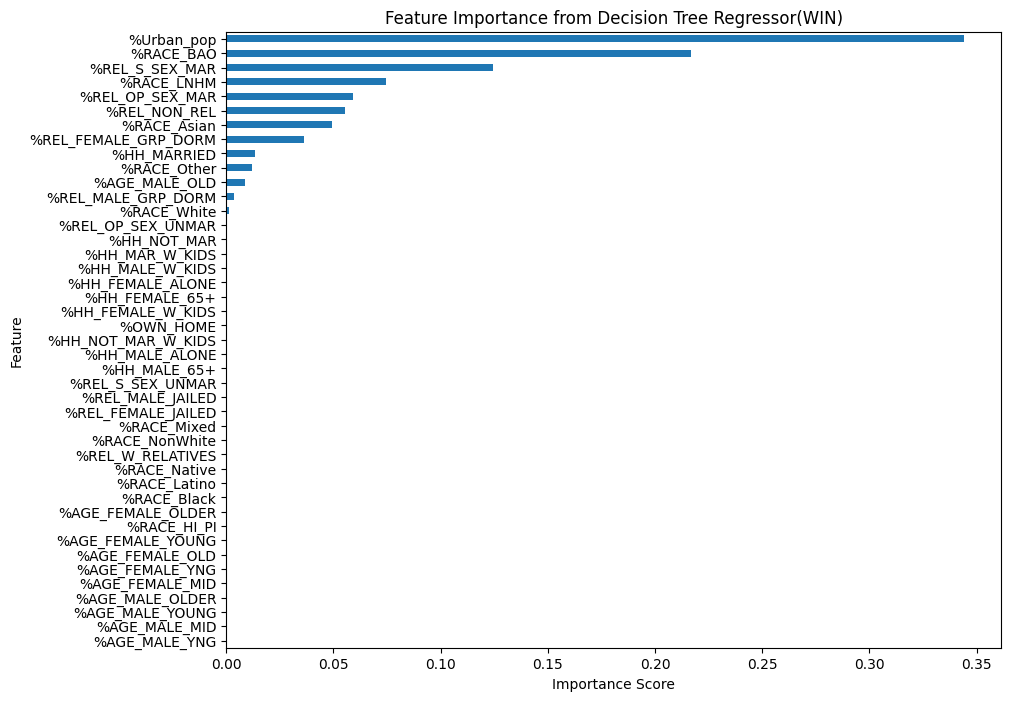

In [46]:
# Define the features (X) and the target variable (y)
# Exclude the target variables themselves from the features
features_for_dtc = [col for col in VOTE_DF.columns if col not in [
    'GEOID', 'Male_total', 'Female_total', 'PARTY_WIN', 'PARTY_LEAD']]

# Define the features (X) and the target variable (y)
X1 = VOTE_DF[features_for_dtc]
y1 = VOTE_DF['PARTY_WIN']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=1)

# Initialize and train the Decision Tree Regressor model
# You can adjust parameters like max_depth, min_samples_split, min_samples_leaf
dtc_model = DecisionTreeClassifier(
    random_state=1,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10)

dtc_model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred_dtc = dtc_model.predict(X1_test)

# Evaluate the model
mse = mean_squared_error(y1_test, y1_pred_dtc)
rmse = np.sqrt(mse) # Calculate RMSE manually
mae = mean_absolute_error(y1_test, y1_pred_dtc)
r2 = r2_score(y1_test, y1_pred_dtc)

print("Decision Tree Regressor Model Evaluation (on test set):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Get and plot feature importances from the trained model
print("\nFeature Importance from Decision Tree Regressor:")
dtc_feature_importance = pd.Series(dtc_model.feature_importances_, index=features_for_dtc)

# Sort and print feature importances
print(dtc_feature_importance.sort_values(ascending=False).head(15))

# Plot feature importances
plt.figure(figsize=(10, 8)) # Adjusted figure size
dtc_feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance from Decision Tree Regressor(WIN)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Feature Importance for PARTY_LEAD from Decision Tree Regressor

Decision Tree Regressor Model Evaluation (on test set):
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.14
R-squared (R2): 0.68

Feature Importance from Decision Tree Regressor:
%HH_MARRIED          0.36
%RACE_Asian          0.31
%REL_S_SEX_MAR       0.08
%RACE_White          0.07
%REL_OP_SEX_UNMAR    0.07
%RACE_BAO            0.04
%RACE_LNHM           0.03
%Urban_pop           0.01
%REL_NON_REL         0.01
%AGE_FEMALE_YOUNG    0.01
%RACE_Other          0.01
%OWN_HOME            0.00
%HH_NOT_MAR_W_KIDS   0.00
%HH_MAR_W_KIDS       0.00
%RACE_NonWhite       0.00
%AGE_FEMALE_OLDER    0.00
%AGE_MALE_YOUNG      0.00
%AGE_MALE_MID        0.00
%AGE_MALE_OLD        0.00
%AGE_MALE_YNG        0.00
dtype: float64


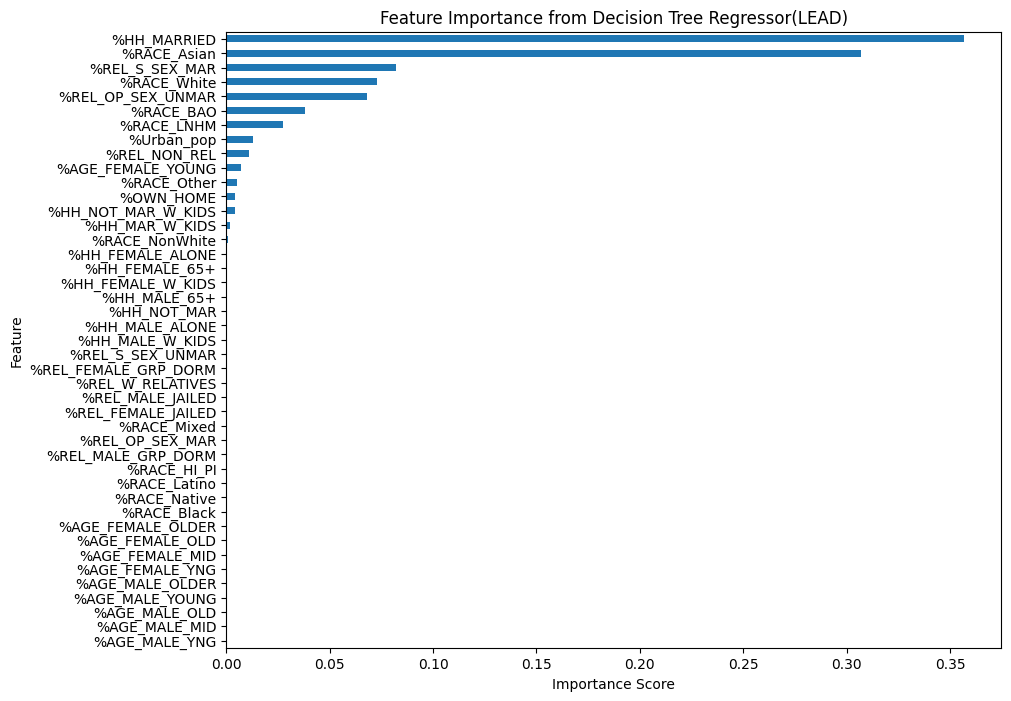

In [47]:
X2 = VOTE_DF[features_for_dtc]
y2 = VOTE_DF['PARTY_LEAD']

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=1)

# Initialize and train the Decision Tree Regressor model
# You can adjust parameters like max_depth, min_samples_split, min_samples_leaf
dtr_model = DecisionTreeRegressor(
    random_state=1,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10)

dtr_model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred_dtr = dtr_model.predict(X2_test)

# Evaluate the model
mse = mean_squared_error(y2_test, y2_pred_dtr)
rmse = np.sqrt(mse) # Calculate RMSE manually
mae = mean_absolute_error(y2_test, y2_pred_dtr)
r2 = r2_score(y2_test, y2_pred_dtr)

print("Decision Tree Regressor Model Evaluation (on test set):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Get and plot feature importances from the trained model
print("\nFeature Importance from Decision Tree Regressor:")
dtr_feature_importance = pd.Series(dtr_model.feature_importances_, index=features_for_dtc)

# Sort and print feature importances
print(dtr_feature_importance.sort_values(ascending=False).head(20))

# Plot feature importances
plt.figure(figsize=(10, 8)) # Adjusted figure size
dtr_feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance from Decision Tree Regressor(LEAD)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Feature Importance for PARTY_WIN from Random Forest

Feature Importance from Random Forest:
%Urban_pop             0.08
%RACE_Asian            0.08
%RACE_White            0.06
%OWN_HOME              0.06
%HH_MARRIED            0.06
%RACE_NonWhite         0.06
%REL_S_SEX_MAR         0.05
%REL_NON_REL           0.05
%REL_OP_SEX_MAR        0.04
%AGE_FEMALE_YOUNG      0.03
%RACE_BAO              0.03
%RACE_Other            0.03
%AGE_FEMALE_YNG        0.03
%RACE_Black            0.03
%HH_NOT_MAR            0.02
%REL_OP_SEX_UNMAR      0.02
%HH_MAR_W_KIDS         0.02
%REL_W_RELATIVES       0.02
%AGE_MALE_YNG          0.02
%AGE_MALE_YOUNG        0.01
%REL_S_SEX_UNMAR       0.01
%HH_FEMALE_W_KIDS      0.01
%RACE_LNHM             0.01
%REL_FEMALE_GRP_DORM   0.01
%REL_MALE_GRP_DORM     0.01
%HH_FEMALE_ALONE       0.01
%HH_NOT_MAR_W_KIDS     0.01
%RACE_Latino           0.01
%AGE_MALE_OLDER        0.01
%HH_MALE_ALONE         0.01
%RACE_Mixed            0.01
%AGE_FEMALE_OLDER      0.01
%AGE_FEMALE_OLD        0.01
%AGE_MALE_OLD          0.01
%REL_FEMA

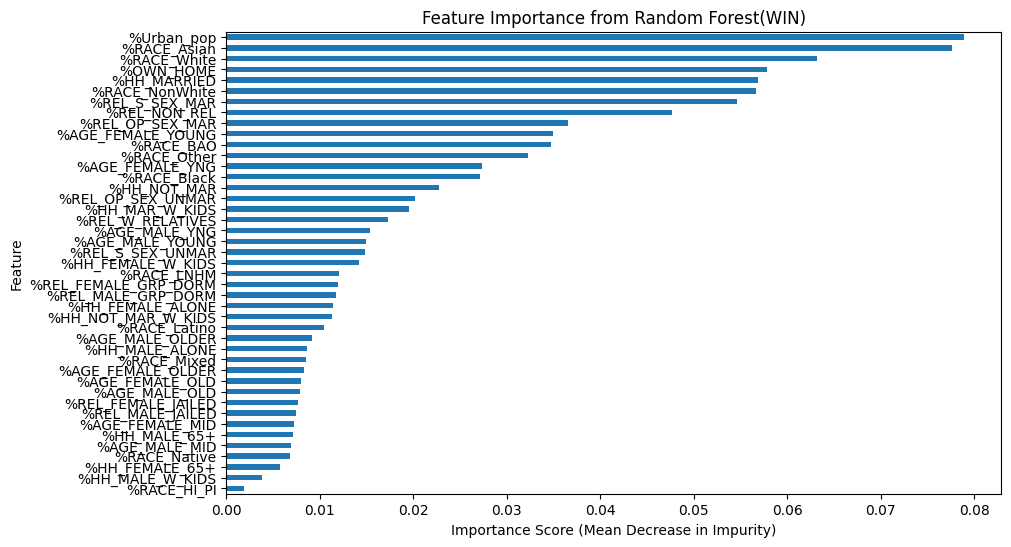


Random Forest Model Evaluation (on test set):
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       517
           1       0.82      0.88      0.85       109

    accuracy                           0.95       626
   macro avg       0.90      0.92      0.91       626
weighted avg       0.95      0.95      0.95       626

Confusion Matrix:
[[496  21]
 [ 13  96]]


In [48]:
# Select features for the Random Forest model
# We can use the same set of features that worked for the logistic regression,
# or consider a broader set. Let's start with the same set for consistency.
features_for_rf = features_for_logit # Use the same features as the final logistic regression

X3 = VOTE_DF[features_for_rf]
y3 = VOTE_DF['PARTY_WIN']

# Split data into training and testing sets (recommended for model evaluation)
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=1, stratify=y3)

# Initialize and train the Random Forest Classifier
# Use a reasonable number of estimators (n_estimators) and a random state for reproducibility
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,        # can set to something like 10–20 if overfitting
    min_samples_split=10,  # avoid tiny splits
    min_samples_leaf=5,    # smoother trees
    random_state=1,
    class_weight='balanced')
rf_model.fit(X3_train, y3_train)

# Get feature importances from the trained model
rf_feature_importance = pd.Series(
    rf_model.feature_importances_, index=features_for_rf)

# Sort and print feature importances
print("Feature Importance from Random Forest:")
print(rf_feature_importance.sort_values(ascending=False))

# Plot feature importances
plt.figure(figsize=(10, 6))
rf_feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance from Random Forest(WIN)')
plt.xlabel('Importance Score (Mean Decrease in Impurity)')
plt.ylabel('Feature')
plt.show()

# Evaluate the model on the test set
y3_pred_rf = rf_model.predict(X3_test)

print("\nRandom Forest Model Evaluation (on test set):")
print(f"Accuracy: {accuracy_score(y3_test, y3_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y3_test, y3_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y3_test, y3_pred_rf))

### Define permutation importance function (with optional cross-validation)

                 Feature  Importance Mean  Importance Std
14           %RACE_Asian     5.591054e-03        0.004119
18        %RACE_NonWhite     3.354633e-03        0.002077
10           %RACE_White     2.715655e-03        0.001897
23        %REL_S_SEX_MAR     2.076677e-03        0.001757
9      %AGE_FEMALE_OLDER     1.437700e-03        0.000479
8      %AGE_FEMALE_YOUNG     6.389776e-04        0.002391
40     %HH_FEMALE_W_KIDS     4.792332e-04        0.001023
38      %HH_FEMALE_ALONE     4.792332e-04        0.001605
41             %OWN_HOME     4.792332e-04        0.001897
5        %AGE_FEMALE_YNG     3.194888e-04        0.000639
12          %RACE_Latino    -1.110223e-17        0.000714
11           %RACE_Black    -1.597444e-04        0.000479
15           %RACE_HI_PI    -1.597444e-04        0.000479
25      %REL_W_RELATIVES    -1.597444e-04        0.000860
22     %REL_OP_SEX_UNMAR    -1.597444e-04        0.001118
20            %RACE_LNHM    -3.194888e-04        0.000958
30  %REL_FEMAL

<Figure size 1000x600 with 0 Axes>

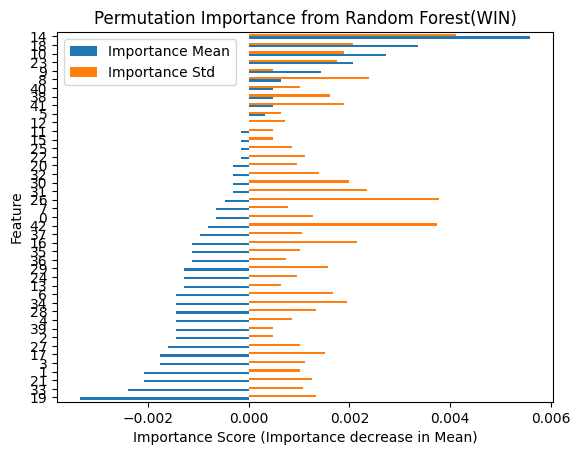

In [49]:
# Compute permutation importance (PI) or cross-validated PI (CV-PI)
def get_PI(model, X3, y3, cv=False, n_splits=5, n_repeats=10, random_state=1):
    """
    Parameters
    ----------
    model : estimator
        Trained model (must support predict).
    X : DataFrame
        Features used for prediction.
    y : Series or array-like
        Target values.
    cv : bool, default=False
        If True, performs cross-validated permutation importance.
    n_splits : int, default=5
        Number of CV folds (only used if cv=True).
    n_repeats : int, default=10
        Number of shuffles for permutation importance.
    random_state : int, default=1
        Random seed for reproducibility.

    Returns
    -------
    importance_df : DataFrame
        Feature importances sorted by mean decrease in score.
    """

    if not cv:
        # Standard PI on a single fitted model
        result = permutation_importance(model, X3, y3,
                                        n_repeats=n_repeats,
                                        random_state=random_state,
                                        n_jobs=-1)
        importance_df = pd.DataFrame({
            'Feature': X3.columns,
            'Importance Mean': result.importances_mean,
            'Importance Std': result.importances_std
        }).sort_values(by='Importance Mean', ascending=False)

    else:
        # Cross-validated PI
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        importances = []

        for train_idx, test_idx in skf.split(X3, y3):
            X3_train, X3_test = X3.iloc[train_idx], X3.iloc[test_idx]
            y3_train, y3_test = y3.iloc[train_idx], y3.iloc[test_idx]

            model.fit(X3_train, y3_train)
            result = permutation_importance(model, X3_test, y3_test,
                                            n_repeats=n_repeats,
                                            random_state=random_state,
                                            n_jobs=-1)
            importances.append(result.importances_mean)

        mean_importances = np.mean(importances, axis=0)
        std_importances = np.std(importances, axis=0)

        importance_df = pd.DataFrame({
            'Feature': X3.columns,
            'Importance Mean': mean_importances,
            'Importance Std': std_importances
        }).sort_values(by='Importance Mean', ascending=False)
    return importance_df

# Confirm
pd.set_option('display.max_rows', None)
pd.reset_option('display.float_format')

RF_PI = get_PI(rf_model, X3_test, y3_test, cv=False)
print(RF_PI)

# Plot permutation importances
plt.figure(figsize=(10, 6))
# Convert 'Importance Mean' to numeric before plotting
RF_PI['Importance Mean'] = pd.to_numeric(RF_PI['Importance Mean'])
RF_PI.sort_values(by='Importance Mean', ascending=True).plot(kind='barh')
plt.title('Permutation Importance from Random Forest(WIN)')
plt.xlabel('Importance Score (Importance decrease in Mean)')
plt.ylabel('Feature')
plt.show()

### Run RFECV with Random Forest to confirm best features

In [50]:
# Utillize X, y, train, test from Logit (X0, y0)

# RFECV with Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
selector = RFECV(estimator=rf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
selector.fit(X0_train, y0_train)

# Best features
best_features = X0.columns[selector.support_].tolist()
print("Best feature subset:")
print(best_features)

# Retrain final model with best features
rf_ECV = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced')
rf_ECV.fit(X0_train[best_features], y0_train)
y_pred_ECV = rf_ECV.predict(X0_test[best_features])

print("\nFinal Model Evaluation with Best Features:")
print(f"Accuracy: {accuracy_score(y0_test, y_pred_ECV):.4f}")
print("Classification Report:")
print(classification_report(y0_test, y_pred_ECV))
print("Confusion Matrix:")
print(confusion_matrix(y0_test, y_pred_ECV))

Best feature subset:
['%AGE_MALE_YNG', '%AGE_MALE_YOUNG', '%AGE_MALE_OLDER', '%AGE_FEMALE_YNG', '%AGE_FEMALE_OLD', '%AGE_FEMALE_YOUNG', '%RACE_White', '%RACE_Black', '%RACE_Asian', '%RACE_Other', '%RACE_NonWhite', '%RACE_BAO', '%RACE_LNHM', '%REL_OP_SEX_MAR', '%REL_OP_SEX_UNMAR', '%REL_S_SEX_MAR', '%REL_W_RELATIVES', '%REL_NON_REL', '%REL_FEMALE_GRP_DORM', '%HH_MARRIED', '%HH_MAR_W_KIDS', '%HH_NOT_MAR', '%HH_NOT_MAR_W_KIDS', '%HH_FEMALE_ALONE', '%HH_FEMALE_W_KIDS', '%OWN_HOME', '%Urban_pop']

Final Model Evaluation with Best Features:
Accuracy: 0.9425
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       517
           1       0.89      0.76      0.82       109

    accuracy                           0.94       626
   macro avg       0.92      0.87      0.89       626
weighted avg       0.94      0.94      0.94       626

Confusion Matrix:
[[507  10]
 [ 26  83]]


## Feature importance for PARTY_LEAD from Lasso Regression after Cross-validate Alpha

Optimal alpha found by LassoCV: 0.0002



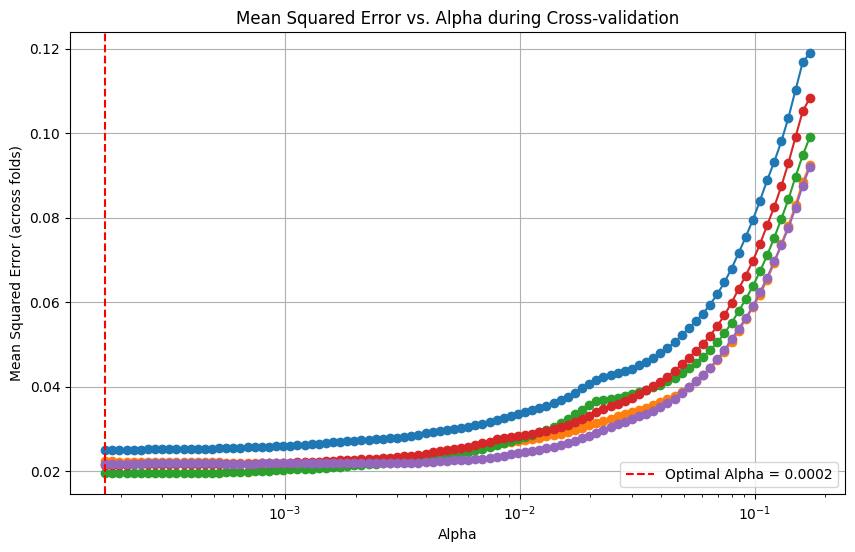


Feature Importance from LassoCV (CV = 0.0002):
%HH_NOT_MAR             0.209896
%AGE_FEMALE_OLD         0.183461
%HH_MAR_W_KIDS          0.169190
%RACE_BAO               0.105929
%AGE_MALE_YOUNG         0.098287
%AGE_MALE_OLDER         0.080242
%HH_FEMALE_ALONE        0.078683
%RACE_Native            0.061318
%HH_MARRIED             0.045222
%AGE_MALE_OLD           0.037339
%HH_FEMALE_W_KIDS       0.035789
%REL_NON_REL            0.032712
%OWN_HOME               0.030776
%REL_S_SEX_MAR          0.025568
%AGE_FEMALE_MID         0.024143
%Urban_pop              0.022294
%RACE_Other             0.019955
%REL_FEMALE_GRP_DORM    0.018446
%RACE_Asian             0.016420
%HH_MALE_ALONE          0.016028
%RACE_HI_PI             0.015773
%AGE_FEMALE_YOUNG       0.015607
%AGE_FEMALE_OLDER       0.013477
%HH_MALE_W_KIDS         0.009134
Female_total            0.006777
Male_total              0.001404
%AGE_MALE_MID           0.001384
%AGE_MALE_YNG           0.000000
%AGE_FEMALE_YNG         0.00

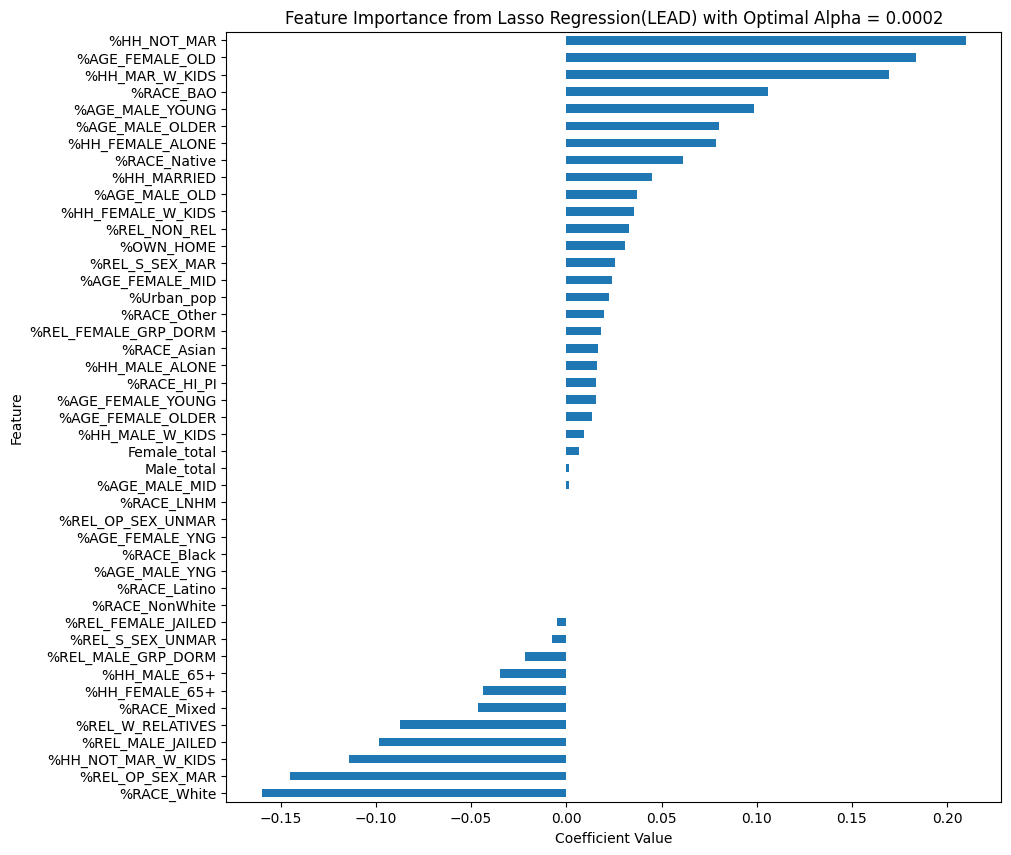


Lasso Regression Model Evaluation (with Optimal Alpha):
Mean Squared Error (MSE) on test set: 0.0200
Root Mean Squared Error (RMSE) on test set: 0.1415
R-squared (R2) on test set: 0.8086


In [51]:
# Define features and exclude target variables
features_for_lasso_cv = [col for col in VOTE_DF.columns if col not in ['GEOID', 'PARTY_WIN', 'PARTY_LEAD']]
X4 = VOTE_DF[features_for_lasso_cv]
y4 = VOTE_DF['PARTY_LEAD']

# Split into train and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, test_size=0.2, random_state=1)

# Standardize the features
scaler = StandardScaler()
X4_train_scaled = scaler.fit_transform(X4_train)
X4_test_scaled = scaler.transform(X4_test)

# Let LassoCV automatically generates an alpha grid to test
lasso_cv_model = LassoCV(cv=5, random_state=1, max_iter=10000)
lasso_cv_model.fit(X4_train_scaled, y4_train)

# Confirm the optimal alpha found by LassoCV
optimal_alpha = lasso_cv_model.alpha_
print(f"Optimal alpha found by LassoCV: {optimal_alpha:.4f}")
print("")
# Plot the MSE as a function of alpha
mse_path = lasso_cv_model.mse_path_
alphas = lasso_cv_model.alphas_

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, linestyle='-', marker='o')
plt.xscale('log') # Often useful to plot alpha on a log scale
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (across folds)')
plt.title('Mean Squared Error vs. Alpha during Cross-validation')
plt.axvline(optimal_alpha, color='red', linestyle='--', label=f'Optimal Alpha = {optimal_alpha:.4f}')
plt.legend()
plt.grid(True)
plt.show()

# List the coefficients with the optimal alpha
print("\nFeature Importance from LassoCV (CV = 0.0002):")
feature_importance_lasso_cv = pd.Series(lasso_cv_model.coef_, index=features_for_lasso_cv)
print(feature_importance_lasso_cv.sort_values(ascending=False))

# Plot feature importances with optimal alpha
plt.figure(figsize=(10, 10))
feature_importance_lasso_cv.sort_values().plot(kind='barh')
plt.title(f'Feature Importance from Lasso Regression(LEAD) with Optimal Alpha = {optimal_alpha:.4f}')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Evaluate the final Lasso model with the optimal alpha on the test set
y4_pred_lasso_cv = lasso_cv_model.predict(X4_test_scaled)

print("\nLasso Regression Model Evaluation (with Optimal Alpha):")
mse_test = mean_squared_error(y4_test, y4_pred_lasso_cv)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y4_test, y4_pred_lasso_cv)

print(f"Mean Squared Error (MSE) on test set: {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.4f}")
print(f"R-squared (R2) on test set: {r2_test:.4f}")

## Compare feature importance

In [52]:
def normalize_series(s, keep_sign=True):
    """Normalize feature importance to 0–1 scale, optionally keeping sign."""
    s = s.fillna(0)
    if keep_sign:
        return s / s.abs().max()  # scale to -1..1, preserving sign
    else:
        scaler = MinMaxScaler()
        return pd.Series(scaler.fit_transform(s.values.reshape(-1, 1)).flatten(), index=s.index)

# Collect raw importances into a DataFrame
feature_importances = pd.DataFrame({
    'LogReg': logit_feature_importance,
    'DecTreeClass': dtc_feature_importance,
    'DecTreeReg': dtr_feature_importance,
    'RandomForest': rf_feature_importance,
    'RF_PI': RF_PI.set_index('Feature')['Importance Mean'],  # permutation importance
    'Lasso_LogReg': feature_importance_lasso_cv})

# Normalize each column (preserving sign for coefficients)
for col in feature_importances.columns:
    if col in ['LogReg', 'Lasso_LogReg']:  # signed coefficients
        feature_importances[col] = normalize_series(feature_importances[col], keep_sign=True)
    else:  # tree-based importances are ≥ 0
        feature_importances[col] = normalize_series(feature_importances[col], keep_sign=False)

# Compute mean rank or average importance across models
feature_importances['Avg_Importance'] = feature_importances.abs().mean(axis=1)

# Sort by average importance
feature_importances = feature_importances.sort_values(by='Avg_Importance', ascending=False)

# Print the top features
print("\nTop 25 Features Across Models (normalized):")
display(feature_importances.round(4))


Top 25 Features Across Models (normalized):


,LogReg,DecTreeClass,DecTreeReg,RandomForest,RF_PI,Lasso_LogReg,Avg_Importance
%RACE_Asian,0.2036,0.1439,0.8599,0.9830,1.0000,0.0782,0.5448
%RACE_White,-0.3309,0.0042,0.2044,0.7998,0.6786,-0.7626,0.4634
%HH_MARRIED,-0.3918,0.0389,1.0000,0.7205,0.3393,0.2154,0.4510
%Urban_pop,0.0769,1.0000,0.0367,1.0000,0.2857,0.1062,0.4176
%HH_NOT_MAR,1.0000,0.0000,0.0000,0.2882,0.1071,1.0000,0.3992
%HH_MAR_W_KIDS,0.9923,0.0000,0.0052,0.2479,0.3393,0.8061,0.3985
%REL_S_SEX_MAR,0.1914,0.3616,0.2303,0.6924,0.6071,0.1218,0.3674
%AGE_FEMALE_OLD,0.6793,0.0000,0.0000,0.1008,0.3036,0.8741,0.3263
%RACE_BAO,0.2419,0.6299,0.1063,0.4396,0.0000,0.5047,0.3204
%RACE_NonWhite,0.3169,0.0000,0.0029,0.7180,0.7500,0.0000,0.2980


# RFECV Feature Selection for final model

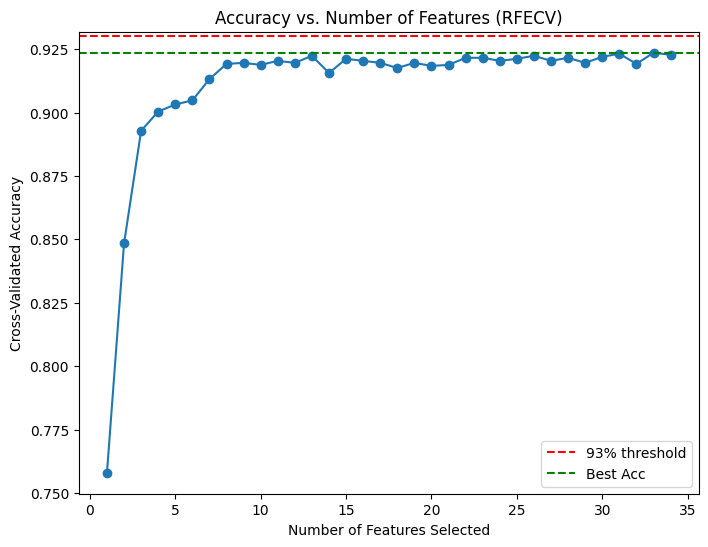


Best Feature Subset:
['%AGE_MALE_YOUNG', '%AGE_MALE_OLDER', '%AGE_FEMALE_YOUNG', '%AGE_FEMALE_OLDER', '%RACE_White', '%RACE_Black', '%RACE_Latino', '%RACE_Native', '%RACE_Asian', '%RACE_Other', '%RACE_Mixed', '%REL_OP_SEX_MAR', '%REL_OP_SEX_UNMAR', '%REL_S_SEX_MAR', '%REL_S_SEX_UNMAR', '%REL_W_RELATIVES', '%REL_NON_REL', '%REL_MALE_JAILED', '%REL_FEMALE_JAILED', '%REL_MALE_GRP_DORM', '%REL_FEMALE_GRP_DORM', '%HH_MARRIED', '%HH_MAR_W_KIDS', '%HH_NOT_MAR', '%HH_NOT_MAR_W_KIDS', '%HH_MALE_ALONE', '%HH_MALE_65+', '%HH_MALE_W_KIDS', '%HH_FEMALE_ALONE', '%HH_FEMALE_65+', '%HH_FEMALE_W_KIDS', '%OWN_HOME', '%Urban_pop']

Final Model Evaluation with Best Features:
Accuracy: 0.9441
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       517
           1       0.91      0.75      0.82       109

    accuracy                           0.94       626
   macro avg       0.93      0.87      0.90       626
weighted avg       0.94

,Feature,Importance
4,%RACE_White,0.074866
8,%RACE_Asian,0.073010
32,%Urban_pop,0.072022
21,%HH_MARRIED,0.065046
13,%REL_S_SEX_MAR,0.063107
11,%REL_OP_SEX_MAR,0.053296
31,%OWN_HOME,0.050149
16,%REL_NON_REL,0.048102
2,%AGE_FEMALE_YOUNG,0.043805
5,%RACE_Black,0.040919


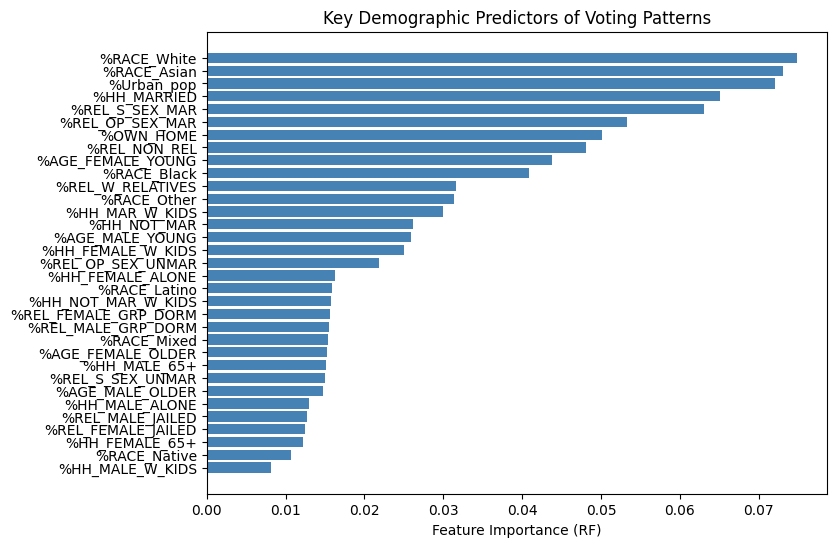

In [53]:
# Prepare Data, drop reference and overlap features
drop_features = [
    'Male_total', 'Female_total', # reference only
    '%AGE_MALE_YNG', '%AGE_MALE_MID', '%AGE_MALE_OLD', # overlap
    '%AGE_FEMALE_YNG', '%AGE_FEMALE_MID', '%AGE_FEMALE_OLD', # overlap
    '%RACE_NonWhite', '%RACE_BAO', '%RACE_LNHM'] # overlap

VOTE_FULL = VOTE_DF.drop(
    columns=drop_features,
    errors='ignore')

X = VOTE_FULL.drop(
    columns=['GEOID', 'PARTY_WIN', 'PARTY_LEAD'])
y = VOTE_FULL['PARTY_WIN']

# Train/test split
XF_train, XF_test, yF_train, yF_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# Recursive Feature Elimination with Cross-Validation
rf = RandomForestClassifier(
    n_estimators=400, random_state=1, class_weight="balanced")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
selector = RFECV(
    estimator=rf, step=1, cv=cv, scoring="accuracy", n_jobs=-1)
selector.fit(XF_train, yF_train)

# Plot accuracy vs. number of features
n_features = np.arange(
    1, len(selector.cv_results_['mean_test_score']) + 1)

plt.figure(figsize=(8,6))
plt.plot(n_features, selector.cv_results_['mean_test_score'], marker="o")
plt.axhline(0.93, color="red", linestyle="--", label="93% threshold")
plt.axhline(max(selector.cv_results_['mean_test_score']), color="green", linestyle="--", label="Best Acc")
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Accuracy vs. Number of Features (RFECV)")
plt.legend()
plt.show()

# Retrain with Best Features
best_features = X.columns[
    selector.support_].tolist()
print("\nBest Feature Subset:")
print(best_features)

rf_final = RandomForestClassifier(
    n_estimators=400, random_state=1, class_weight="balanced")
rf_final.fit(
    XF_train[best_features], yF_train)
yF_pred = rf_final.predict(
    XF_test[best_features])

print("\nFinal Model Evaluation with Best Features:")
print(f"Accuracy: {accuracy_score(yF_test, yF_pred):.4f}")
print("Classification Report:")
print(classification_report(yF_test, yF_pred))
print("Confusion Matrix:")
print(confusion_matrix(yF_test, yF_pred))

# Plot Feature Importance
importances = rf_final.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": best_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop Features Driving Model Accuracy:")
display(feat_imp)

plt.figure(figsize=(8,6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"], color="steelblue")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance (RF)")
plt.title("Key Demographic Predictors of Voting Patterns")
plt.show()

## Train FINAL MODEL

In [77]:
# Select final features: From "accuracy vs. number of features" plot, ideal number of features start at 8, 9, or 10, compare 8-10 features for accuracy and MANOVA scores (dropped HH_MARRIED due to correlation with REL_xxx_MAR)

final_features = [ # Drop '%AGE_FEMALE_YOUNG', '%REL_W_RELATIVES' for best results
    'GEOID', 'PARTY_WIN', 'PARTY_LEAD',
    '%RACE_White', '%RACE_Asian', '%Urban_pop', '%REL_S_SEX_MAR',
    '%REL_OP_SEX_MAR', '%OWN_HOME', '%REL_NON_REL', '%RACE_Black']
VOTE_FINAL = VOTE_DF[final_features]

# Set features for final model
X_final = [col for col in VOTE_FINAL.columns if col not in [
    'GEOID', 'PARTY_WIN', 'PARTY_LEAD']]
y_final = VOTE_FINAL['PARTY_WIN']

# Train/test split
XF_train, XF_test, yF_train, yF_test = train_test_split(
    VOTE_FINAL[X_final], y_final,
    test_size=0.2, random_state=1,
    stratify=y_final)

# Train Random Forest
rf_final = RandomForestClassifier(
    n_estimators=500,
    random_state=1,
    class_weight='balanced')
rf_final.fit(XF_train, yF_train)

# Evaluate
yF_pred = rf_final.predict(XF_test)

print("\nFinal Model Evaluation:")
print(f"Accuracy: {accuracy_score(yF_test, yF_pred):.4f}")
print("Classification Report:")
print(classification_report(yF_test, yF_pred))
print("Confusion Matrix:")
print(confusion_matrix(yF_test, yF_pred))


Final Model Evaluation:
Accuracy: 0.9409
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       517
           1       0.88      0.76      0.82       109

    accuracy                           0.94       626
   macro avg       0.92      0.87      0.89       626
weighted avg       0.94      0.94      0.94       626

Confusion Matrix:
[[506  11]
 [ 26  83]]


## Use MANOVA to assess whether multiple features jointly differ between Democrats and Republicans

In [78]:
maov = MANOVA(endog=VOTE_FINAL[X_final], exog=VOTE_FINAL[[y_final.name]])
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
           x0           Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.4770 8.0000 3118.0000 427.3524 0.0000
         Pillai's trace 0.5230 8.0000 3118.0000 427.3524 0.0000
 Hotelling-Lawley trace 1.0965 8.0000 3118.0000 427.3524 0.0000
    Roy's greatest root 1.0965 8.0000 3118.0000 427.3524 0.0000



## Run CV PI


Cross-validated Permutation Importance:
           Feature  Importance Mean  Importance Std
0      %RACE_White           0.0408          0.0083
1      %RACE_Asian           0.0314          0.0035
7      %RACE_Black           0.0262          0.0063
3   %REL_S_SEX_MAR           0.0216          0.0057
2       %Urban_pop           0.0163          0.0064
6     %REL_NON_REL           0.0162          0.0047
4  %REL_OP_SEX_MAR           0.0128          0.0047
5        %OWN_HOME           0.0104          0.0047


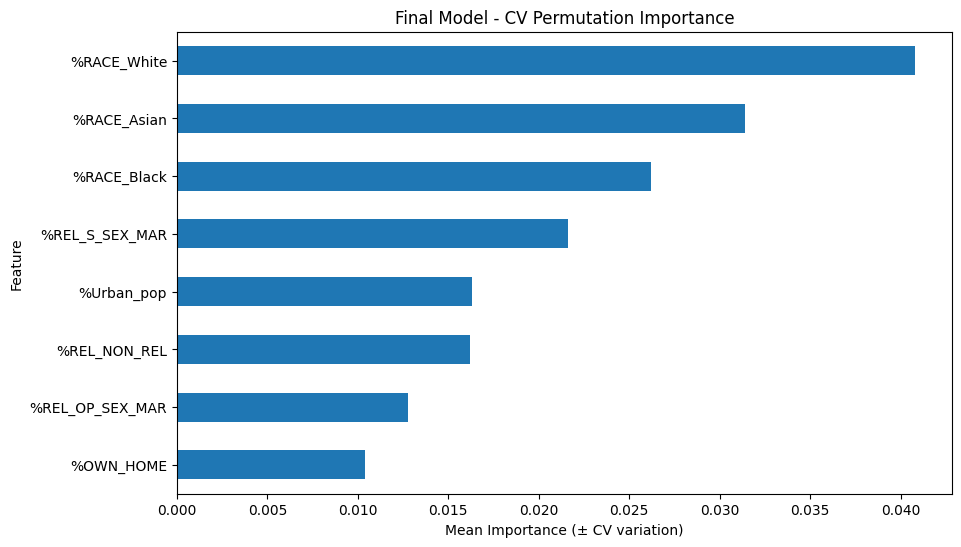

In [79]:
# Cross-validate Permutation Importance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
importances = []

# Pass feature data to skf.split
for train_fcv, test_fcv in skf.split(VOTE_FINAL[X_final], y_final):
    XF_train, XF_test = VOTE_FINAL[X_final].iloc[train_fcv], VOTE_FINAL[X_final].iloc[test_fcv]
    yF_train, yF_test = y_final.iloc[train_fcv], y_final.iloc[test_fcv]

    rf_final.fit(XF_train, yF_train)
    result = permutation_importance(
        rf_final, XF_test, yF_test,
        n_repeats=10, random_state=1, n_jobs=-1)
    importances.append(result.importances_mean)

mean_importances = np.mean(importances, axis=0)
std_importances = np.std(importances, axis=0)

# Build PI DF
pi_df = pd.DataFrame({
    'Feature': X_final, # Use X_final for feature names
    'Importance Mean': mean_importances.round(4),
    'Importance Std': std_importances.round(4)
}).sort_values(by='Importance Mean', ascending=False)

# Confirm
print("\nCross-validated Permutation Importance:")
print(pi_df)

# Plot
plt.figure(figsize=(10, 6))
pi_df.set_index('Feature')['Importance Mean'].sort_values().plot(kind='barh')
plt.title("Final Model - CV Permutation Importance")
plt.xlabel("Mean Importance (± CV variation)")
plt.ylabel("Feature")
plt.show()

# Profile counties with **extremely high PARTY_LEAD** (-30 > LEAD > +30)  

Do the demographics of partisan counties match final feature importance?

In [57]:
VOTE_FINAL.to_csv('VOTE_FINAL.csv', index=False)

## 1. Equal Cutoff Strongholds (±0.5)

In [58]:
def profile_group(dataframe, name, features):
    """Calculates the mean of specified features for a group and returns a Series."""
    # Ensure only numeric columns in features are selected for mean calculation
    numeric_features = dataframe[features].select_dtypes(include=np.number).columns.tolist()
    profile = dataframe[numeric_features].mean()
    profile.name = name
    return profile

# Set cutoff value to 0.50
cutoff_val = 0.50

# Use _FIN to allow R and D access to all variables
extreme_counties = VOTE_FULL[np.abs(VOTE_FULL['PARTY_LEAD']) > cutoff_val]

# Republican strongholds
extreme_R = extreme_counties[extreme_counties['PARTY_LEAD'] < -cutoff_val]

# Democratic strongholds
extreme_D = extreme_counties[extreme_counties['PARTY_LEAD'] > cutoff_val]

print(f"Republican strongholds (cutoff -{cutoff_val}):", extreme_R.shape[0])
print(f"Democratic strongholds (cutoff +{cutoff_val}):", extreme_D.shape[0])

# Select demographic features only (drop outcomes and GEOID)
demo_features = [col for col in VOTE_FULL.columns if col not in ['PARTY_WIN', 'PARTY_LEAD', 'GEOID']]

# Profiles for cutoff-based groups
cutoff_profiles_combined = pd.concat([
    profile_group(extreme_R, 'R_characteristics', demo_features),
    profile_group(extreme_D, 'D_characteristics', demo_features),
], axis=1)

# Add absolute difference column
cutoff_profiles_combined['Abs_Diff'] = np.abs(cutoff_profiles_combined['R_characteristics'] - cutoff_profiles_combined['D_characteristics'])

print(f"\n=== Cutoff-based Stronghold Profiles (>{cutoff_val} Party Lead) ===")
print(cutoff_profiles_combined.sort_values(by='Abs_Diff', ascending=False))

Republican strongholds (cutoff -0.5): 1034
Democratic strongholds (cutoff +0.5): 50

=== Cutoff-based Stronghold Profiles (>0.5 Party Lead) ===
                      R_characteristics  D_characteristics   Abs_Diff
%Urban_pop                    15.962698            72.7334  56.770702
%RACE_White                   82.973888            41.4860  41.487888
%RACE_Black                    2.707737            27.3440  24.636263
%OWN_HOME                     74.847485            53.2120  21.635485
%HH_MARRIED                   51.560542            35.5760  15.984542
%AGE_FEMALE_YOUNG             40.332166            50.3290   9.996834
%AGE_MALE_YOUNG               36.250745            45.2306   8.979855
%AGE_MALE_OLDER               40.657930            33.2140   7.443930
%AGE_FEMALE_OLDER             37.493327            30.2240   7.269327
%REL_OP_SEX_MAR               20.471663            14.0240   6.447663
%RACE_Asian                    0.432398             6.4260   5.993602
%RACE_Latino    

## 2. Balanced Strongholds (Top/Bottom 10% quantiles)

In [59]:
# Set cutoff value
lower_10 = VOTE_FULL['PARTY_LEAD'].quantile(0.10)   # bottom 10% cutoff
upper_10 = VOTE_FULL['PARTY_LEAD'].quantile(0.90)   # top 10% cutoff

R_stnghd_bal = VOTE_FULL[VOTE_FULL['PARTY_LEAD'] <= lower_10].copy()
D_stnghd_bal = VOTE_FULL[VOTE_FULL['PARTY_LEAD'] >= upper_10].copy()

print(f"Republican strongholds (quantile-based): {len(R_stnghd_bal)} counties (<= {lower_10:.2f})")
print(f"Democratic strongholds (quantile-based): {len(D_stnghd_bal)} counties (>= {upper_10:.2f})")

# Select demographic features only (drop outcomes and GEOID)
demo_features = [col for col in VOTE_FULL.columns if col not in [
    'GEOID', 'PARTY_WIN', 'PARTY_LEAD']]

# Profiles for quantile-based groups
balanced_profiles = pd.concat([
    profile_group(R_stnghd_bal, 'R_characteristics', demo_features),
    profile_group(D_stnghd_bal, 'D_characteristics', demo_features),
], axis=1)

# Add absolute difference column
balanced_profiles['Abs_Diff'] = np.abs(balanced_profiles['R_characteristics'] - balanced_profiles['D_characteristics'])

print("\n=== Quantile-based Stronghold Profiles (Top/Bottom 10%) ===")
print(balanced_profiles.sort_values(by='Abs_Diff', ascending=False))

Republican strongholds (quantile-based): 347 counties (<= -0.67)
Democratic strongholds (quantile-based): 323 counties (>= 0.15)

=== Quantile-based Stronghold Profiles (Top/Bottom 10%) ===
                      R_characteristics  D_characteristics   Abs_Diff
%Urban_pop                     8.319798          66.261641  57.941843
%RACE_White                   83.023343          49.008895  34.014448
%RACE_Black                    1.805476          22.598191  20.792715
%OWN_HOME                     75.384726          61.279100  14.105627
%HH_MARRIED                   52.917291          41.040911  11.876380
%AGE_FEMALE_YOUNG             39.526311          47.179814   7.653503
%AGE_MALE_YOUNG               35.634553          42.682910   7.048357
%AGE_MALE_OLDER               40.852738          35.280557   5.572180
%REL_OP_SEX_MAR               21.059942          15.787627   5.272315
%AGE_FEMALE_OLDER             37.685591          32.572848   5.112742
%RACE_Latino                  10.231412 

## Comparison Table

In [80]:
# Build combined comparison table

# Profiles for cutoff-based groups
# Select demographic features only (drop outcomes and GEOID)
demo_features = [col for col in VOTE_FULL.columns if col not in ['PARTY_WIN', 'PARTY_LEAD', 'GEOID']]

cutoff_profiles = pd.concat([
    profile_group(extreme_R, 'R_cutoff', demo_features),
    profile_group(extreme_D, 'D_cutoff', demo_features)
], axis=1)

# Profiles for quantile-based groups
# Select demographic features only (drop outcomes and GEOID)
demo_features = [col for col in VOTE_FULL.columns if col not in ['PARTY_WIN', 'PARTY_LEAD', 'GEOID']]

balanced_profiles = pd.concat([
    profile_group(R_stnghd_bal, 'R_quantile', demo_features),
    profile_group(D_stnghd_bal, 'D_quantile', demo_features)
], axis=1)

# Combine both into one big table
comparison_table = pd.concat([cutoff_profiles, balanced_profiles], axis=1)

# Add difference columns (D – R) for clarity of spread
comparison_table['Diff_cutoff'] = comparison_table['D_cutoff'] - comparison_table['R_cutoff']
comparison_table['Diff_quantile'] = comparison_table['D_quantile'] - comparison_table['R_quantile']

comparison_table = comparison_table.round(2)

# Confirm
print("\n=== Combined Stronghold Profiles (Cutoff vs Quantile) ===")
display(comparison_table.sort_values(by='R_cutoff', ascending=False))


=== Combined Stronghold Profiles (Cutoff vs Quantile) ===


,R_cutoff,D_cutoff,R_quantile,D_quantile,Diff_cutoff,Diff_quantile
%RACE_White,82.97,41.49,83.02,49.01,-41.49,-34.01
%OWN_HOME,74.85,53.21,75.38,61.28,-21.64,-14.11
%HH_MARRIED,51.56,35.58,52.92,41.04,-15.98,-11.88
%AGE_MALE_OLDER,40.66,33.21,40.85,35.28,-7.44,-5.57
%AGE_FEMALE_YOUNG,40.33,50.33,39.53,47.18,10.00,7.65
%AGE_FEMALE_OLDER,37.49,30.22,37.69,32.57,-7.27,-5.11
%AGE_MALE_YOUNG,36.25,45.23,35.63,42.68,8.98,7.05
%REL_OP_SEX_MAR,20.47,14.02,21.06,15.79,-6.45,-5.27
%HH_MAR_W_KIDS,17.29,13.11,18.18,14.63,-4.18,-3.55
%Urban_pop,15.96,72.73,8.32,66.26,56.77,57.94


## Locations of Extremes

In [61]:
# Pad GEOIDs with a leading zero if length is less than 5 and extract state FIPS
R_geoids = [f'{int(geo):05d}' if len(geo) < 5 else geo for geo in extreme_R['GEOID'].unique()]
D_geoids = [f'{int(geo):05d}' if len(geo) < 5 else geo for geo in extreme_D['GEOID'].unique()]

R_fips = [geo[:2] for geo in R_geoids]
D_fips = [geo[:2] for geo in D_geoids]

R_counts = Counter(R_fips)
D_counts = Counter(D_fips)

print("\nCounts for counties above 50% party lead (Min 75-25% split):")
# Sort state_counts by 2-digit state FIPS)
sorted_R_counts = dict(sorted(R_counts.items()))
sorted_D_counts = dict(sorted(D_counts.items()))
print(sorted_R_counts)
print(sorted_D_counts)


Counts for counties above 50% party lead (Min 75-25% split):
{'01': 23, '04': 1, '05': 34, '06': 1, '08': 14, '12': 13, '13': 40, '16': 27, '17': 26, '18': 31, '19': 8, '20': 67, '21': 69, '22': 15, '24': 1, '26': 1, '27': 1, '28': 15, '29': 78, '30': 24, '31': 67, '32': 8, '35': 3, '37': 12, '38': 28, '39': 26, '40': 59, '41': 5, '42': 11, '45': 1, '46': 23, '47': 61, '48': 160, '49': 17, '51': 17, '54': 31, '56': 16}
{'01': 2, '06': 6, '08': 4, '11': 1, '13': 2, '22': 1, '24': 3, '25': 2, '28': 4, '29': 1, '34': 1, '35': 2, '36': 3, '37': 2, '41': 1, '42': 1, '45': 1, '46': 2, '50': 1, '51': 6, '53': 2, '55': 2}


# Results

## 1. Model Performance & Prediction Quality

In [62]:
# Predictions
# Use the subset of features that the model was trained on
yF_pred = rf_final.predict(XF_test)
y_pred_proba = rf_final.predict_proba(XF_test)[:, 1] if hasattr(
               rf_final, "predict_proba") else None

# Collect metrics
performance = {
    "Accuracy": accuracy_score(yF_test, yF_pred),
    "Precision": precision_score(yF_test, yF_pred, zero_division=0),
    "Recall": recall_score(yF_test, yF_pred, zero_division=0),
    "F1 Score": f1_score(yF_test, yF_pred, zero_division=0)
}

if y_pred_proba is not None:
    performance["ROC-AUC"] = roc_auc_score(yF_test, y_pred_proba)

# Create performance DataFrame
perf_df = pd.DataFrame(performance, index=["Final Model"]).T
display(perf_df)

,Final Model
Accuracy,0.937600
Precision,0.864583
Recall,0.761468
F1 Score,0.809756
ROC-AUC,0.964734


## 2. Feature Importance


Cross-validated Permutation Importance:
           Feature  Importance Mean  Importance Std
0      %RACE_White           0.0400          0.0073
1      %RACE_Asian           0.0301          0.0044
7      %RACE_Black           0.0271          0.0055
2   %REL_S_SEX_MAR           0.0206          0.0034
4       %Urban_pop           0.0158          0.0083
6     %REL_NON_REL           0.0154          0.0054
5  %REL_OP_SEX_MAR           0.0115          0.0036
3        %OWN_HOME           0.0094          0.0052


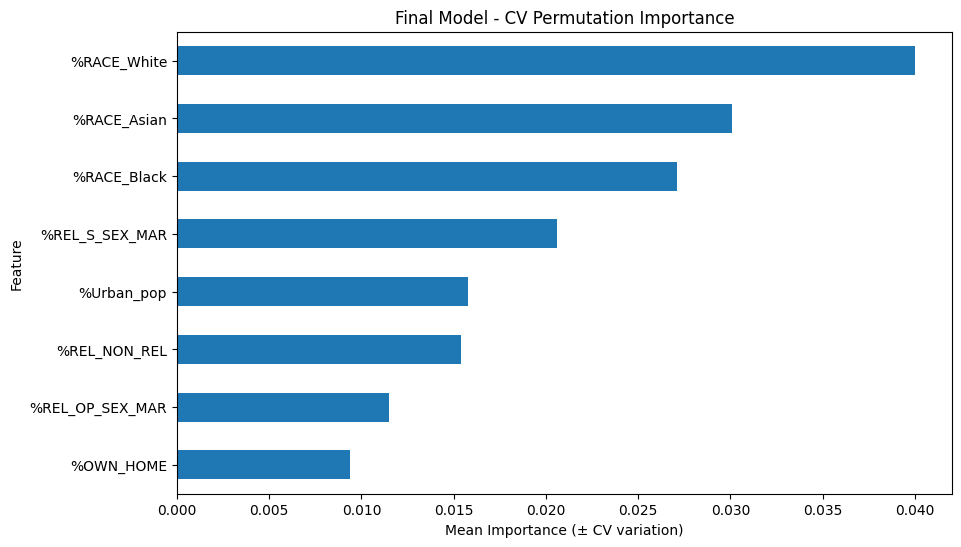

In [63]:
print("\nCross-validated Permutation Importance:")
print(pi_df)

# Plot
plt.figure(figsize=(10, 6))
pi_df.set_index('Feature')['Importance Mean'].sort_values().plot(kind='barh')
plt.title("Final Model - CV Permutation Importance")
plt.xlabel("Mean Importance (± CV variation)")
plt.ylabel("Feature")
plt.show()

## 3. Extreme County Locations

STRONG REPUBLICAN COUNTIES-----STRONG DEMOCRAT
COUNTIES  
01: Alabama (23),------------------------------Alabama (2),  
04: Arizona (1),  
05: Arkansas(34),  
06: California (1),------------------------------California (6),  
08: Colorado (14),-----------------------------Colorado (4),  
11: ----------------------------------------------------D.C. (1),  
12: Florida (13),  
13: Georgia (40),--------------------------------Georgia (2),  
16: Idaho (27),  
17: Illinois (26),  
18: Indiana (31),  
19: Iowa (8),  
20: Kansas (67),  
21: Kentucky (69),  
22: Louisiana (15),-----------------------------Louisiana (1),  
24: Maryland (1),--------------------------------Maryland (3),  
25: -----------------------------------------------------Massachusetts (2),  
26: Michigan (1),   
27: Minnesota (1),  
28: Mississippi (15),---------------------------Mississippi (4),  
29: Missouri (78),-------------------------------Missouri (1),  
30: Montana (24),  
31: Nebraska (67),  
32: New Hampshire (8),  
34: -----------------------------------------------------New Jersey (1),  
35: New Mexico (3),---------------------------New Mexico (2),  
36: -----------------------------------------------------New York (3),  
37: North Carolina (12),----------------------North Carolina (2),  
38: North Dakota (28),  
39: Ohio (26),  
40: Oklahoma (59),  
41: Oregon (5),------------------------------------Oregon (1),  
42: Pennsylvania (11),-------------------------Pennsylvania (1),  
45: South Carolina (1),------------------------South Carolina (1),  
46: South Dakota (23),------------------------South Dakota (2),  
47: Tennessee (61),  
48: Texas (160),  
49: Utah (17),  
50: ------------------------------------------------------Vermont (1),  
51: Virginia (17),----------------------------------Virginia (6),  
53: ------------------------------------------------------Washington (2),  
54: West Virginia (31),  
55: -----------------------------------------------------Wisconsin (2),  
56: Wyoming (16)

Looking at the distribution of strongholds, the Republican base is both wide and dense, with strong states in the Deep South, the Midwest, and the Plains states—particularly Missouri, Kansas, Nebraska, Oklahoma, and Texas.  
Democrats, by contrast, have far fewer strongholds, often limited to isolated urban counties scattered within overwhelmingly Republican states. The most surprising pattern is in California: despite its reputation as a Democratic stronghold at the state level, only six counties emerged as strongly Democratic, compared to a single Republican county. Equally notable are the scattered Democratic enclaves in heavily Republican states such as Mississippi, South Dakota, and Louisiana, showing how local dynamics can carve out exceptions even in states dominated by the opposite party.  
These findings highlight that state-level reputation can sometimes mask county-level complexity in partisan alignment.

## 4. Extreme County Profiles

The comparison of extreme Republican‐leaning and Democratic‐leaning counties reveals demographic and social patterns that align closely with prior research on U.S. voting behavior.  
- Republican counties tend to be in rural areas, majority white, married, older, and more likely to own their homes. There are also somewhat higher shares of older residents living alone.

- By contrast, Democratic counties stand out for their racial and ethnic diversity, with substantially higher percentages of Black, Latino, Asian, Native, and mixed‐race residents. They are also much more urbanized, with over 70% of the population living in urban areas compared to under 20% in Republican strongholds, which leads to higher rentals and lower home ownership. Democratic counties show higher shares of unmarried households, non‐relatives living together, and female‐headed households with children. Younger age distributions also feature more prominently, with both male and female populations skewing younger than in Republican counties.

Overall, the patterns are not surprising. They mirror well‐documented demographic divides in U.S. elections: rural, older, and predominantly White populations lean Republican, while urban, younger, and racially diverse populations lean Democratic. These results validate the modeling approach, as the county‐level features align strongly with real‐world voting dynamics.



## 5. Future Steps and Broader Insights

While this analysis captures core demographic and household correlations to voting behavior, it omits several dimensions that could strengthen explanatory power and refine predictions. Socioeconomic variables—such as income, education levels, and employment sectors—are known to shape political preferences and could highlight additional divides within and across counties. Migration trends, naturalization status, and geographic mobility could also explain differences in partisan lean, particularly in fast‐growing metro regions.

In addition, county‐level aggregates obscure within‐county variation, especially in large metropolitan areas where neighborhoods diverge sharply in demographics and partisanship. Incorporating finer spatial resolution (e.g., census tract or voter precinct) or longitudinal trends over multiple election cycles could help reveal whether these patterns are persistent or shifting. Finally, the integration of turnout variables—distinguishing who is registered, eligible, and actually voting—would broaden the analysis beyond demographic composition to electoral engagement.

Together, these additions would not only deepen the descriptive accuracy but also broaden the explanatory scope of the findings, linking demographic patterns more directly with political outcomes.

END

# Reset pandas display options to default (optional, but good practice)
pd.reset_option('display.max_rows')
pd.reset_option('display.float_format')